# § Chapter 9  Plotting and Visualization

- *matplotlib* is a desktop plotting package designed for creating (mostly two dimensional) publication-quality plots. 
- The project was started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python. The matplotlib and IPython communities have collaborated to simplify interactive plotting from the IPython shell (and now, Jupyter notebook). 
- matplotlib supports various GUI backends on all operating systems and 
- additionally can export visualizations to all of the common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.). 

- Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is *seaborn*, which we explore later in this chapter.

# matplotlib: online matplotlib gallery
https://matplotlib.org/2.0.2/index.html

## Seaborn Example gallery
https://seaborn.pydata.org/examples/index.html

## §9.1 A Brief matplotlib API Primer
-	Figures and Subplots
-	Colors, Markers, and Line Styles
-	Ticks, Labels, and Legends
-	Annotations and Drawing on a Subplot
-	Saving Plots to File
-	matplotlib Configuration

## §9.2 Plotting with pandas and seaborn
-	Line Plots
-	Bar Plots
-	Histograms and Density Plots
-	Scatter or Point Plots
-	Facet Grids and Categorical Data

## §9.3 Other Python Visualization Tools

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows #display max raw in dataframe
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6)) # runtime configuration
# plt.rc('figure', figsize=(8, 4.8)) # runtime configuration

#precision:控制打印精度(小數位數), suppress 是否要改以科學記號顯示
np.set_printoptions(precision=4, suppress=True)

plt.rcParams['axes.unicode_minus']=False # 用來正常顯示負號

In [2]:
# plt.rc

### plt.rc?

What is PLT RC?
Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt. rc convenience routine.

The simplest way to follow the code examples in the chapter is to use interactive plotting
in the Jupyter notebook.

```python
%matplotlib notebook
```

%matplotlib inline sets the backend of matplotlib to the 'inline' backend:

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

## §9.1 A Brief matplotlib API Primer
-	Figures and Subplots
-	Colors, Markers, and Line Styles
-	Ticks, Labels, and Legends
-	Annotations and Drawing on a Subplot
-	Saving Plots to File
-	matplotlib Configuration

In [3]:
%matplotlib notebook

In [4]:
# %matplotlib notebook

In [5]:
# %matplotlib inline

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


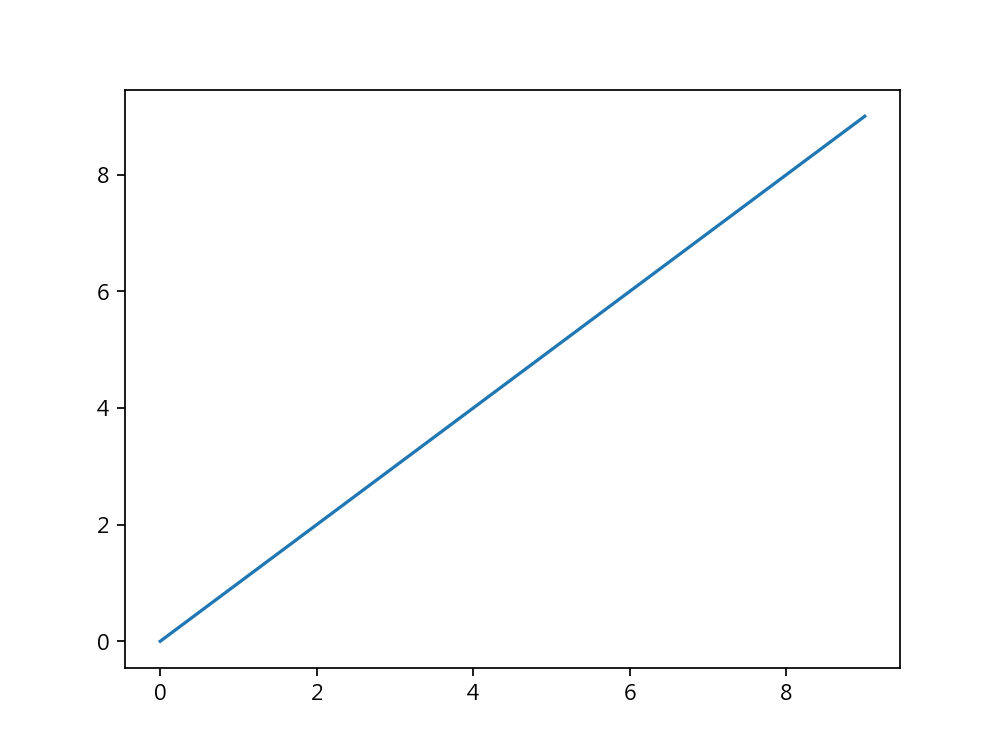

In [9]:
plt.plot(data)

In [10]:
plt.close("all")

### §9.1.1 Figures and Subplots

Plots in matplotlib reside within a Figure object.

<IPython.core.display.Javascript object>


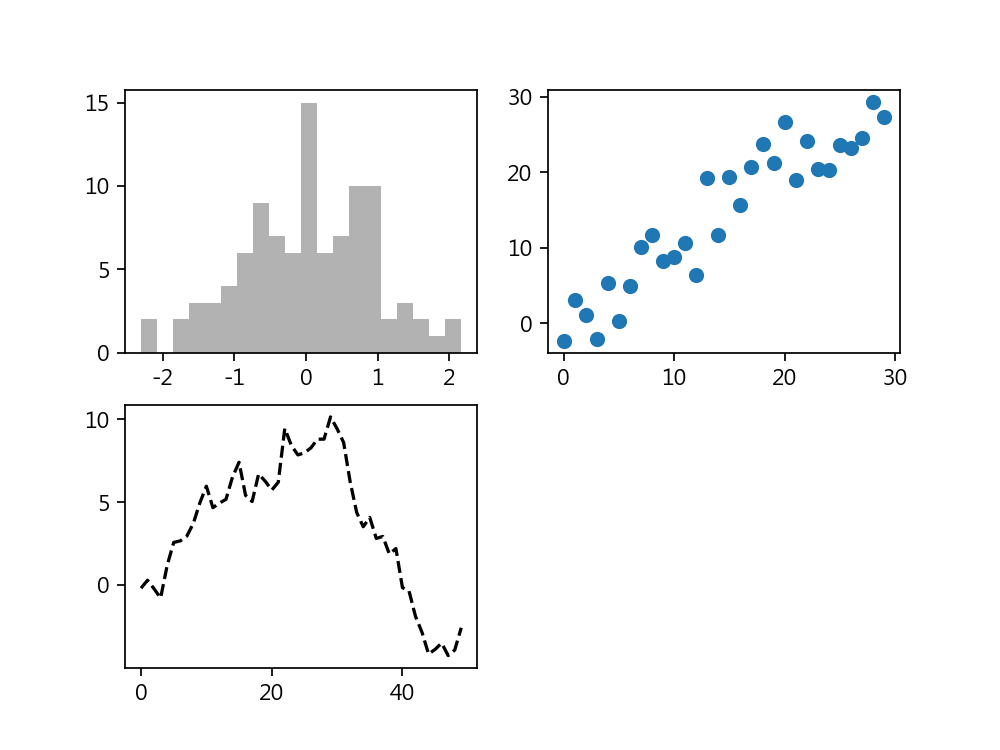

In [11]:
# You can’t make a plot with a blank figure. You have to create one or more subplots 
# using add_subplot:

# for more complex plots you must put all of the plotting commands in a single notebook cell

fig = plt.figure()

# This means that the figure should be 2 × 2 (so up to four plots in total), and we’re
# selecting the first of four subplots (numbered from 1).

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [12]:
plt.plot(np.random.randn(50).cumsum(), 'k--') # 'k--' black dashed line 
# cumsum() -> Return the cumulative sum of the elements along a given axis.

In [13]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

In [14]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) # Histogram 直方圖  alpha => transparency透明度
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) # plt.scatter(x,y)

<IPython.core.display.Javascript object>


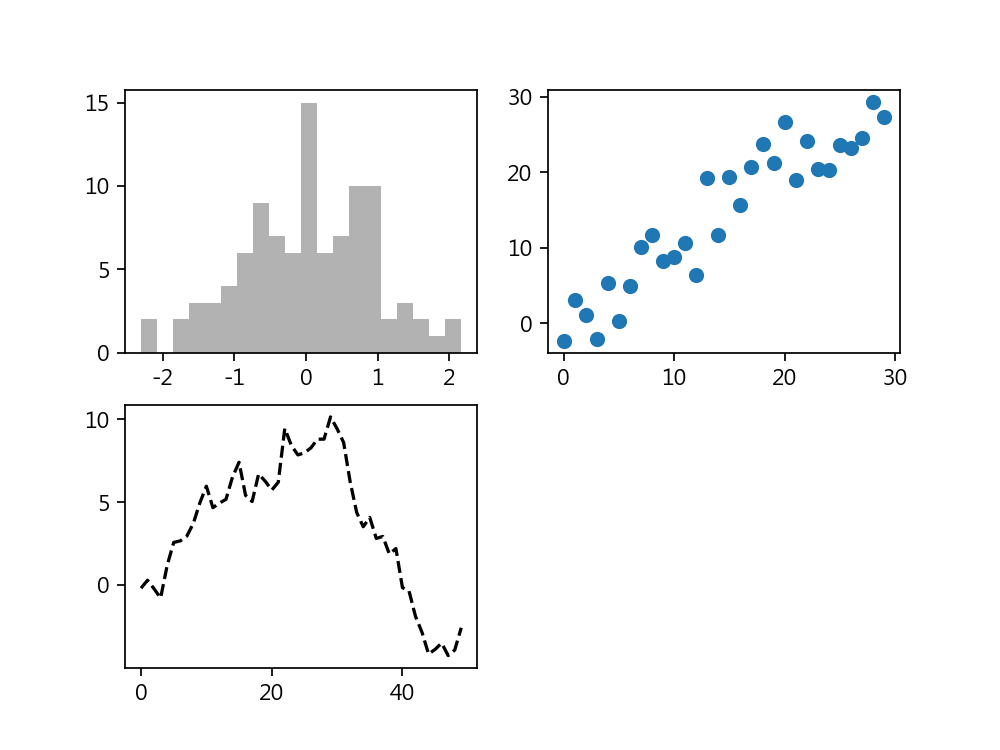

In [15]:
fig

In [16]:
plt.savefig("firstFig.svg")

In [17]:
plt.close('all')

In [19]:
# fig

<IPython.core.display.Javascript object>


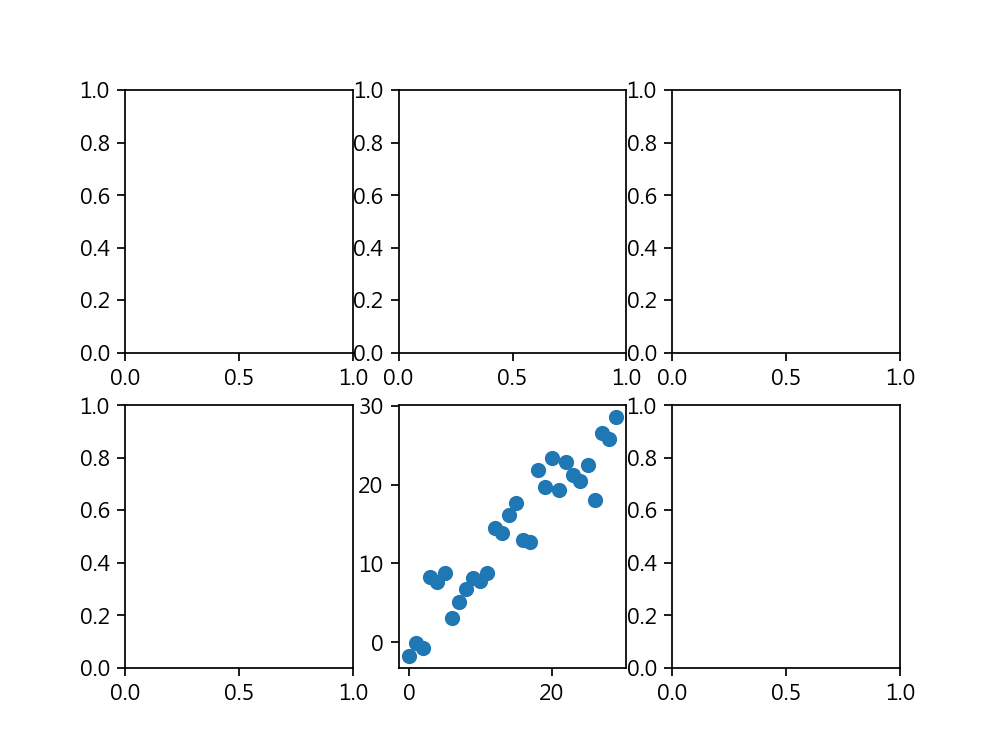

In [20]:
# creates a new figure and returns a NumPy array containing the created subplot objects:

fig, axes = plt.subplots(2, 3) # fig whole figure , axes subfigure

# This is very useful, as the axes array can be easily indexed like a two-dimensional
# array; for example, axes[0, 1].
axes[1,1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) # plt.scatter(x,y)

In [21]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<IPython.core.display.Javascript object>


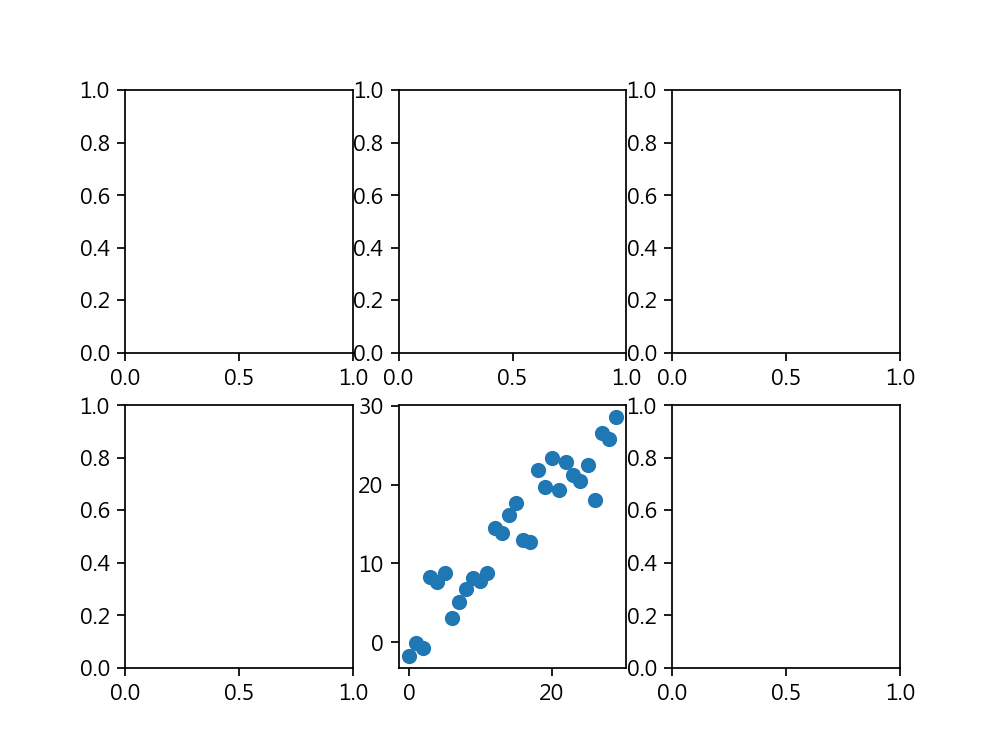

In [22]:
fig

In [23]:
plt.close('all')

#### Adjusting the spacing around subplots

https://blog.csdn.net/ggt55ng6/article/details/88879689

wspace and hspace controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots.
```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

```python
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)
```

<IPython.core.display.Javascript object>


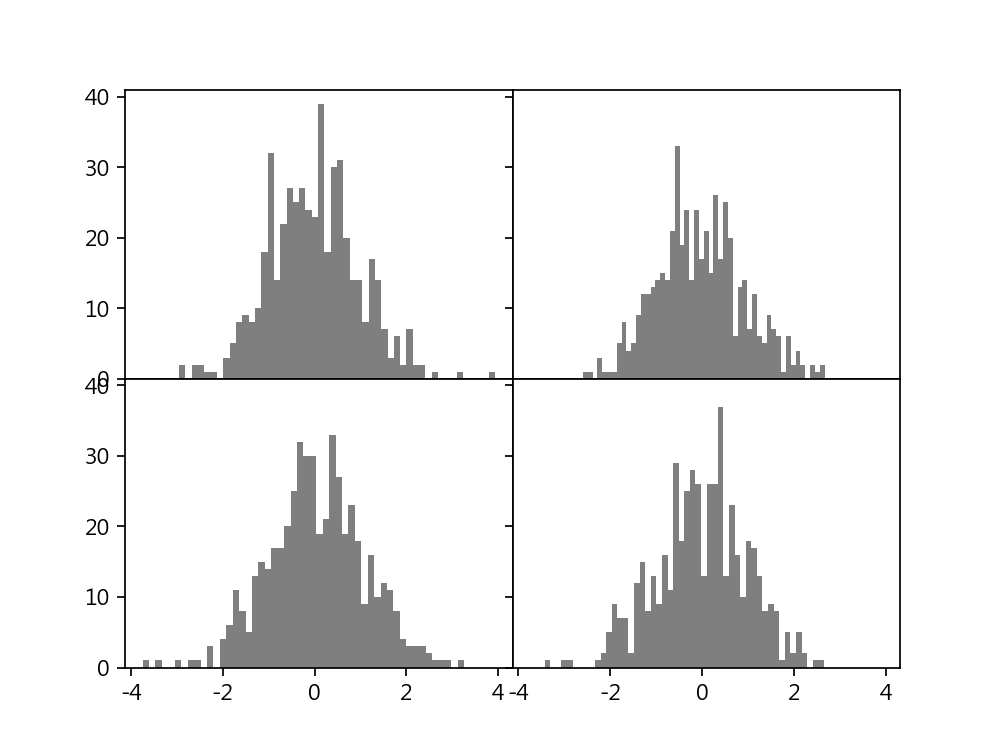

In [24]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):

    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

In [25]:
# wspace and hspace controls the percent of the figure width and figure height
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0)

In [26]:
plt.close('all')

### §9.1.2 Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a
string abbreviation indicating color and line style

```python
ax.plot(x, y, 'g--') # green line and linestyle='--'
```

The same plot could also have been expressed more explicitly as:

```python
ax.plot(x, y, linestyle='--', color='g')
```

There are a number of color abbreviations provided for commonly used colors, but
you can use any color on the spectrum by specifying its hex code (e.g., '#CECECE').


In [27]:
# plt.figure()

<IPython.core.display.Javascript object>


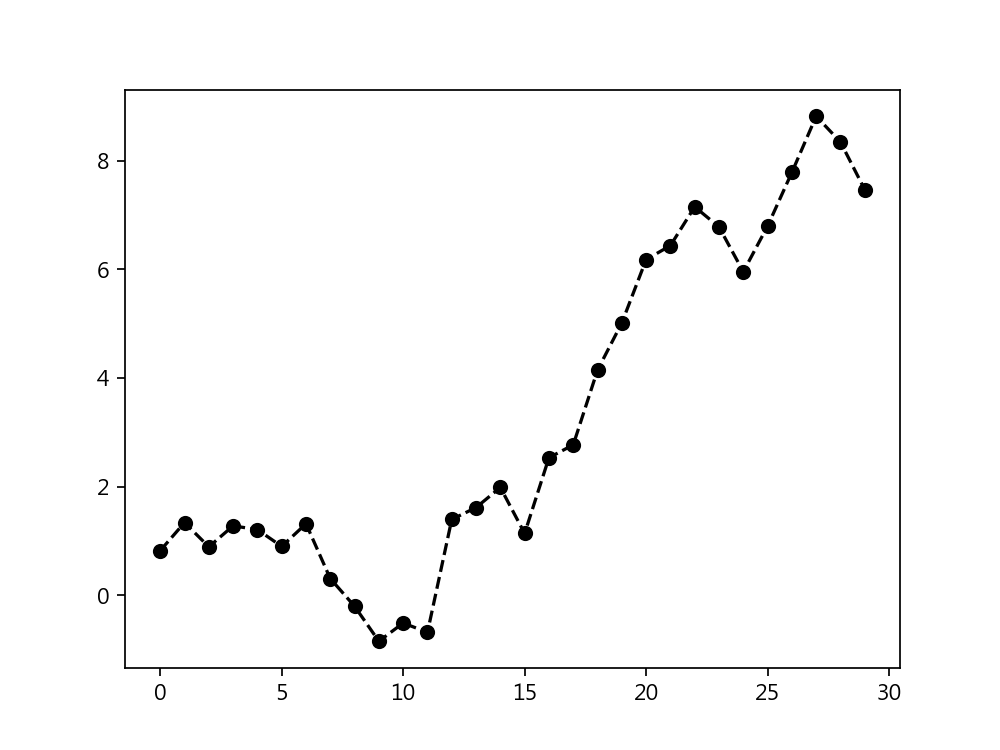

In [28]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--') #'k'-> black  'o'->circle marker '--'-> dashed line style

In [30]:
# see the full set of line styles by looking at the docstring for plot
# plt.plot

In [31]:
plt.close('all')

This could also have been written more explicitly as:
```python
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

<IPython.core.display.Javascript object>


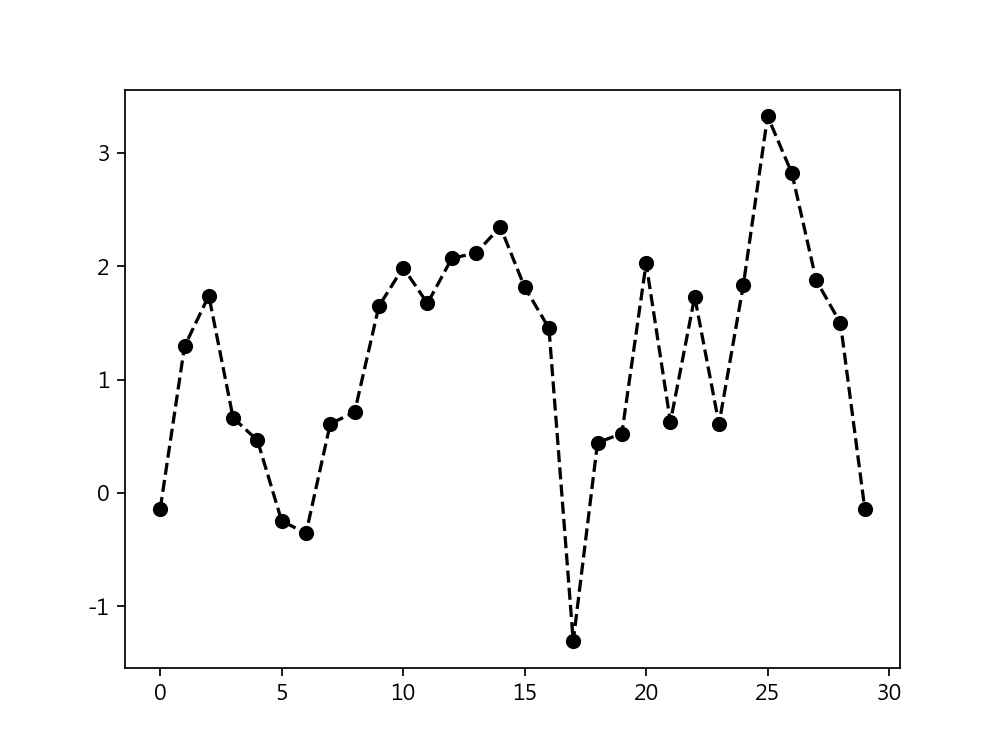

In [32]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [33]:
plt.close('all')

<IPython.core.display.Javascript object>


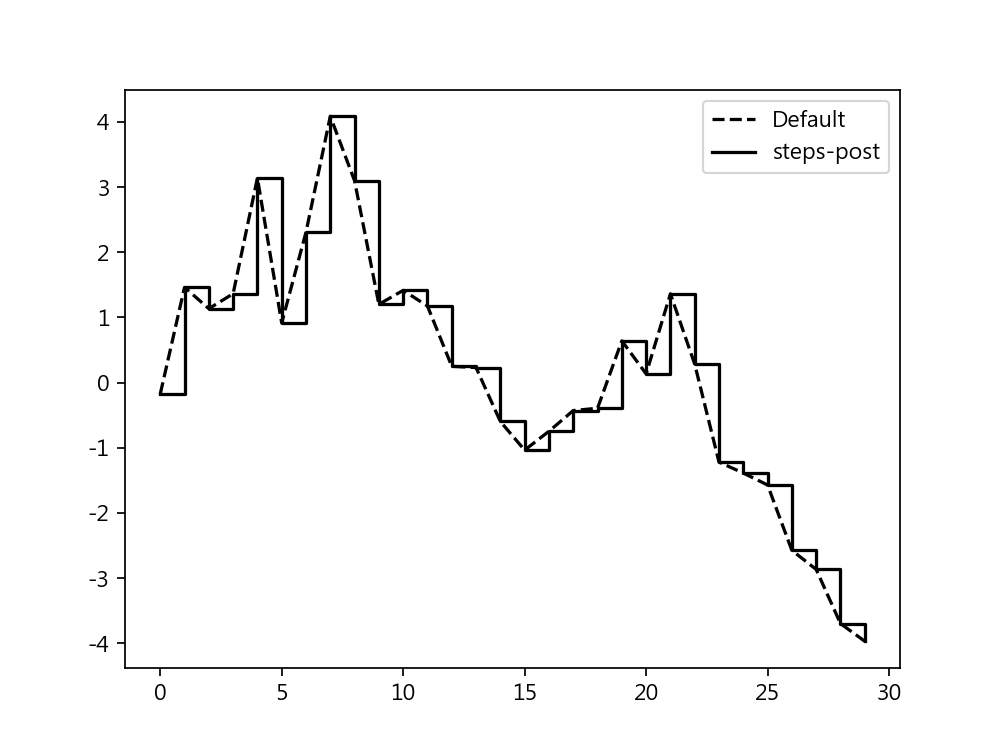

In [34]:
# For line plots, you will notice that subsequent points are linearly interpolated by default.
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post') # drawstyle='steps' drawstyle='steps-mid'
plt.legend(loc='best') #Place a legend on the Axes ,ex:loc='upper left'

In [35]:
plt.close('all')

<IPython.core.display.Javascript object>


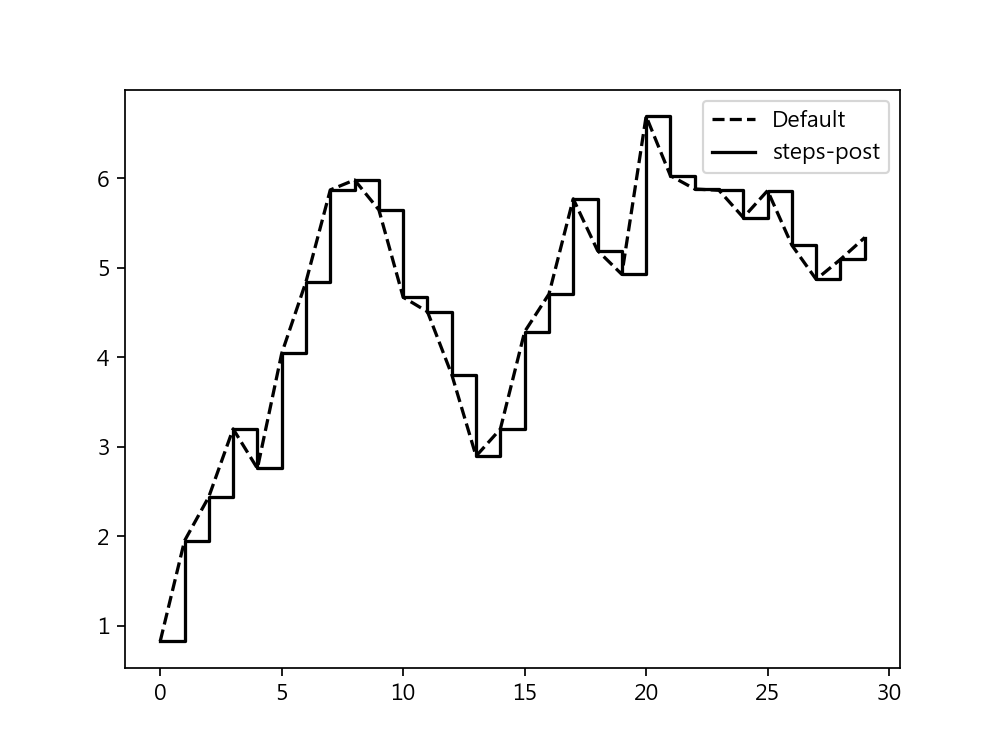

In [36]:
# You may notice output like <matplotlib.lines.Line2D at ...> when you run this.
# matplotlib returns objects that reference the plot subcomponent that was just added.
# A lot of the time you can safely ignore this output.

data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

In [37]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post') # drawstyle='steps' drawstyle='steps-mid'

In [38]:
plt.legend(loc='best') #Place a legend on the Axes ,ex:loc='upper left'

In [39]:
plt.close('all')

### §9.1.3 Ticks (刻度), Labels (標籤), and Legends (圖例、說明文)

#### Setting the title (主題), axis labels (軸線籤), ticks (刻度), and ticklabels (刻度標籤)

<IPython.core.display.Javascript object>


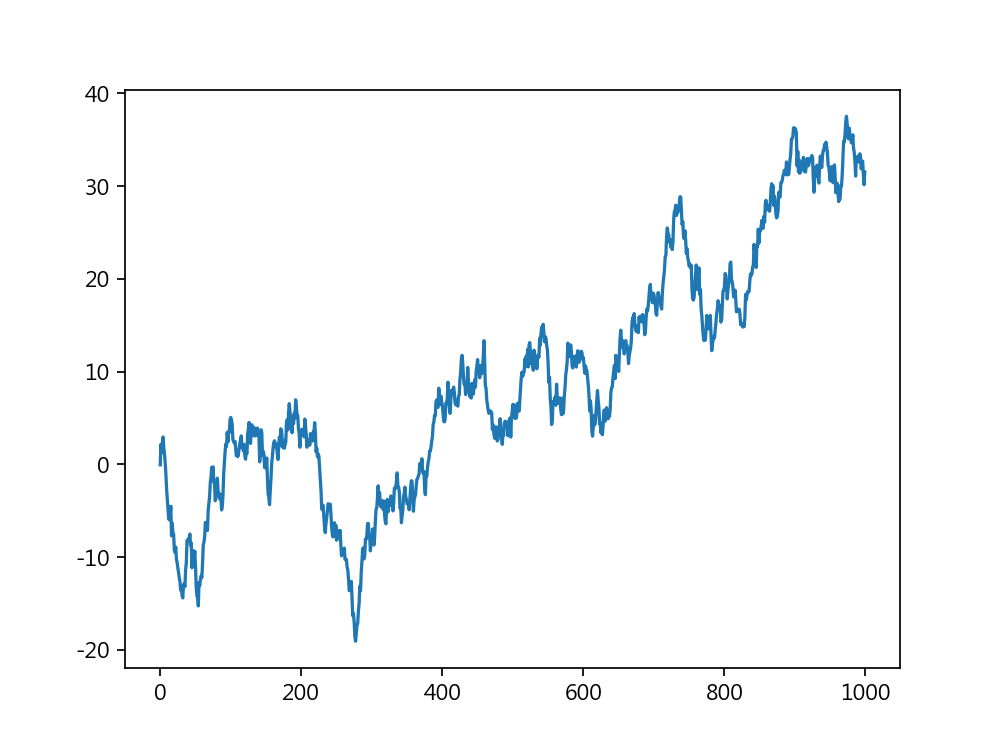

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

<IPython.core.display.Javascript object>


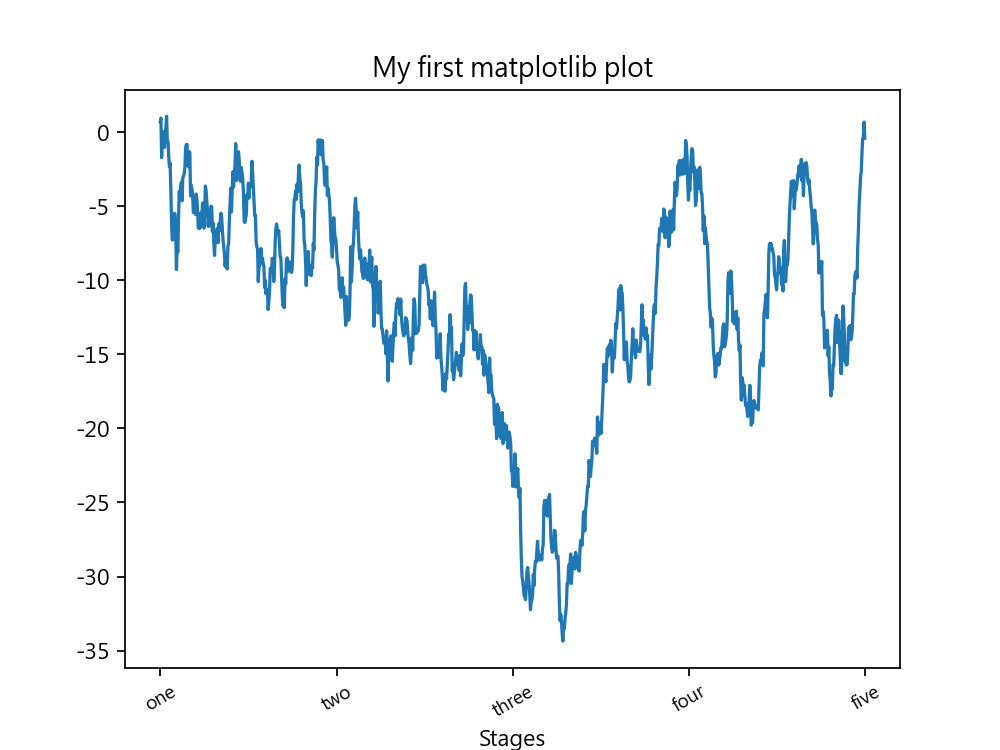

Text(0.5, 0, 'Stages')

In [41]:
# To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
# former instructs matplotlib where to place the ticks along the data range;

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

In [42]:
plt.close('all')

<IPython.core.display.Javascript object>


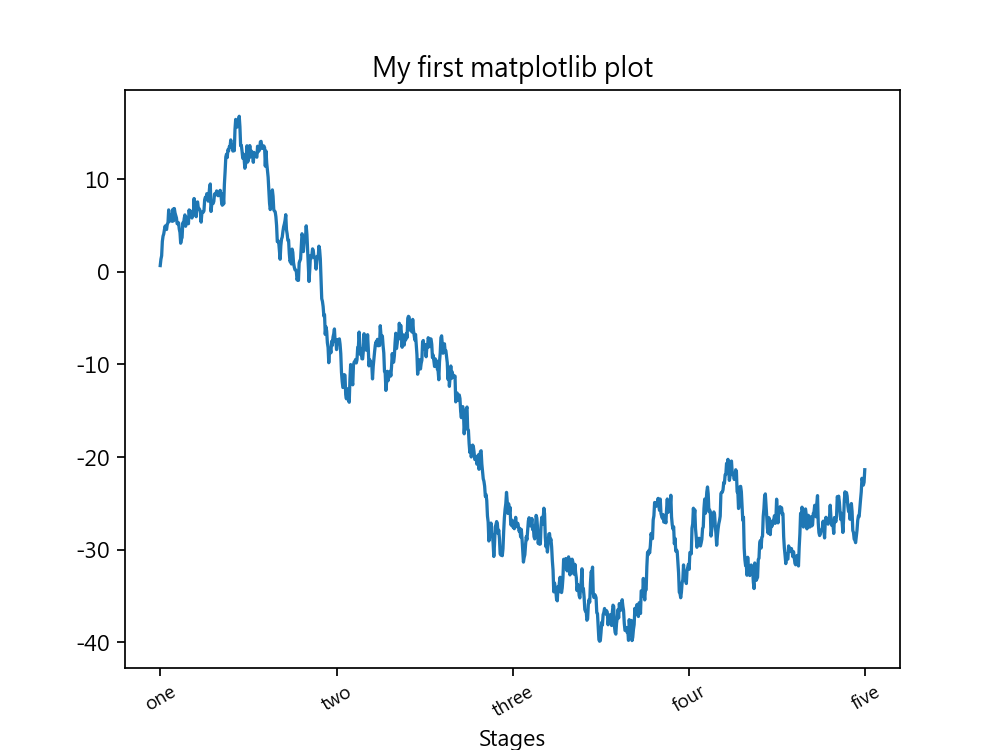

In [43]:
# 以下慢動作

# To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. The
# former instructs matplotlib where to place the ticks along the data range;

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [44]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [45]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [46]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [47]:
ax.set_xlabel('Stages')

Text(0.5, 21.040014954102304, 'Stages')

The axes class has a set method that allows batch setting of plot properties
```python
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)
```

In [48]:
plt.close("all")

<IPython.core.display.Javascript object>


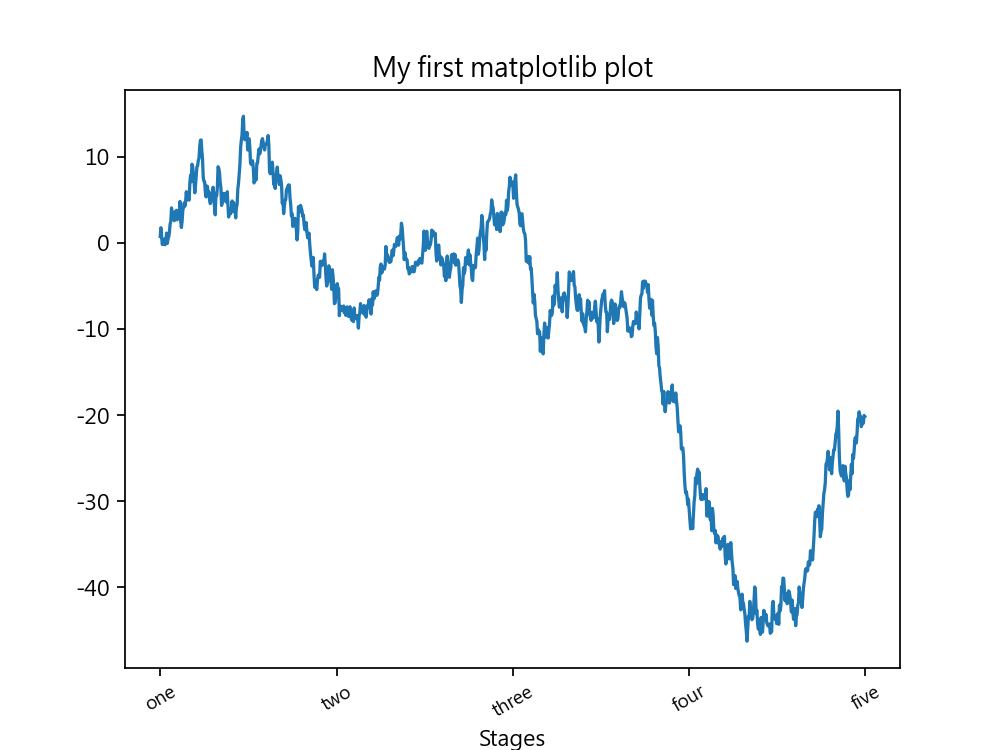

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

In [50]:
plt.close("all")

#### Adding legends (圖例)

<IPython.core.display.Javascript object>


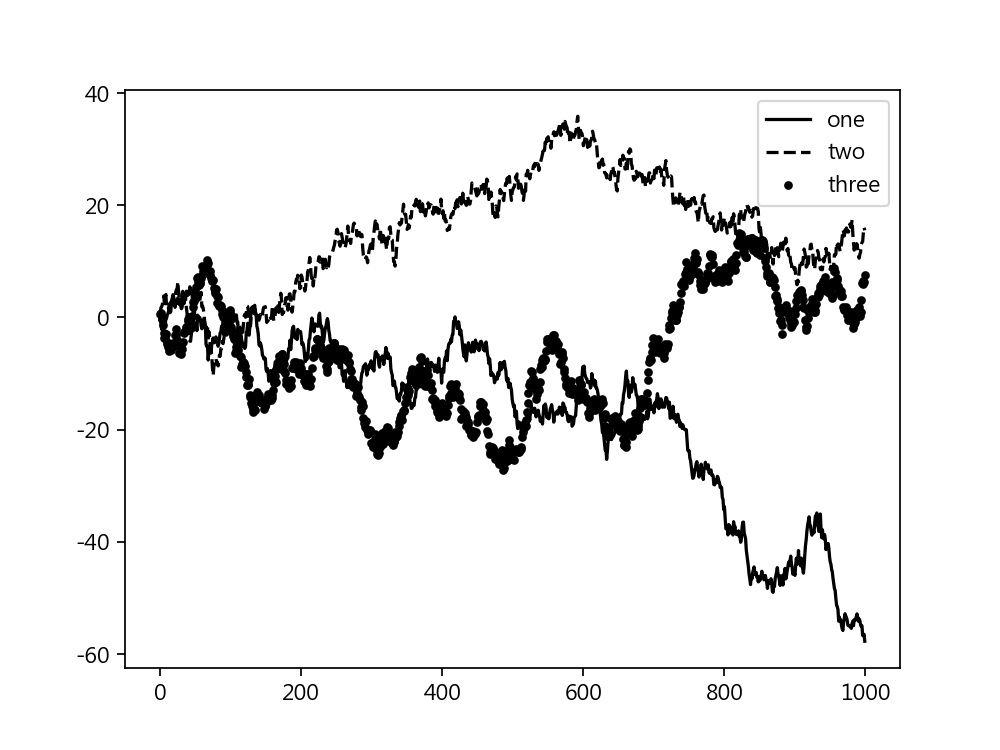

In [53]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [52]:
# The loc tells matplotlib where to place the plot. If you aren’t picky, 'best' is a good
# option, as it will choose a location that is most out of the way.
ax.legend(loc='best')

In [54]:
# 效果一樣
plt.legend(loc='best')

### §9.1.4 Annotations (注釋) and Drawing on a Subplot (畫圖)

In addition to the standard plot types, you may wish to draw your own plot annotations,
which could consist of:
- text, 
- arrows, or 
- other shapes.

text:
```python
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```

<IPython.core.display.Javascript object>


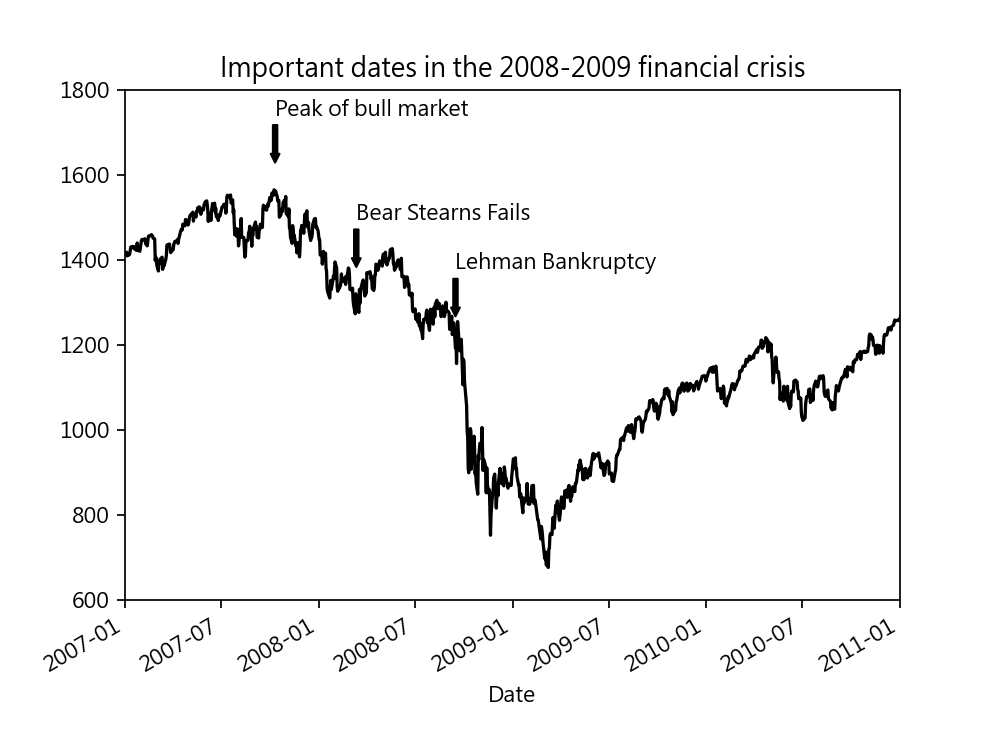

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [55]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), # Series.asof() -> find the value of Series associate with index
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, #draw a arrow between the positions xy and xytext.
                                headlength=4),
                horizontalalignment='left', verticalalignment='top') # display of xytext

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [56]:
plt.savefig("crisis.svg")

In [57]:
plt.savefig("crisis.pdf")

<IPython.core.display.Javascript object>


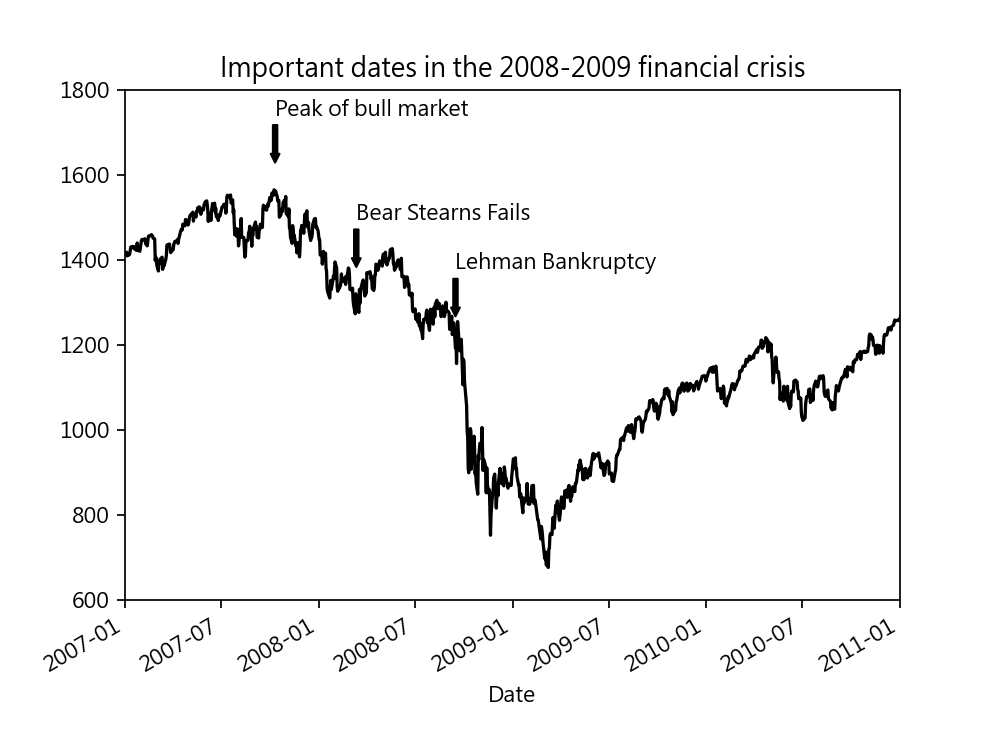

<AxesSubplot:xlabel='Date'>

In [58]:
# 重播一次

from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

In [59]:
type(spx)

pandas.core.series.Series

In [60]:
spx.head()

Date
1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

In [61]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [62]:
# There are a couple of important points to highlight in this plot: the ax.annotate
# method can draw labels at the indicated x and y coordinates.
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), # Series.asof() -> find the value of Series associate with index
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, #draw a arrow between the positions xy and xytext.
                                headlength=4),
                horizontalalignment='left', verticalalignment='top') # display of xytext

In [63]:
# Zoom in on 2007-2010

# use the set_xlim and set_ylim methods to manually set the start and end boundaries for the plot
# rather than using matplotlib’s default.
ax.set_xlim(['1/1/2007', '1/1/2011'])

(13514.0, 14975.0)

In [64]:
ax.set_ylim([600, 1800])

(600.0, 1800.0)

In [65]:
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [66]:
spx

Date
1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

In [67]:
# read the value indexed by the datetime
spx.asof(datetime(1990, 2, 1))

328.79

In [68]:
plt.close("all")

```python
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
```

## patches (貼塊)
Drawing shapes requires some more care. matplotlib has objects that represent many
common shapes, referred to as patches.

<IPython.core.display.Javascript object>


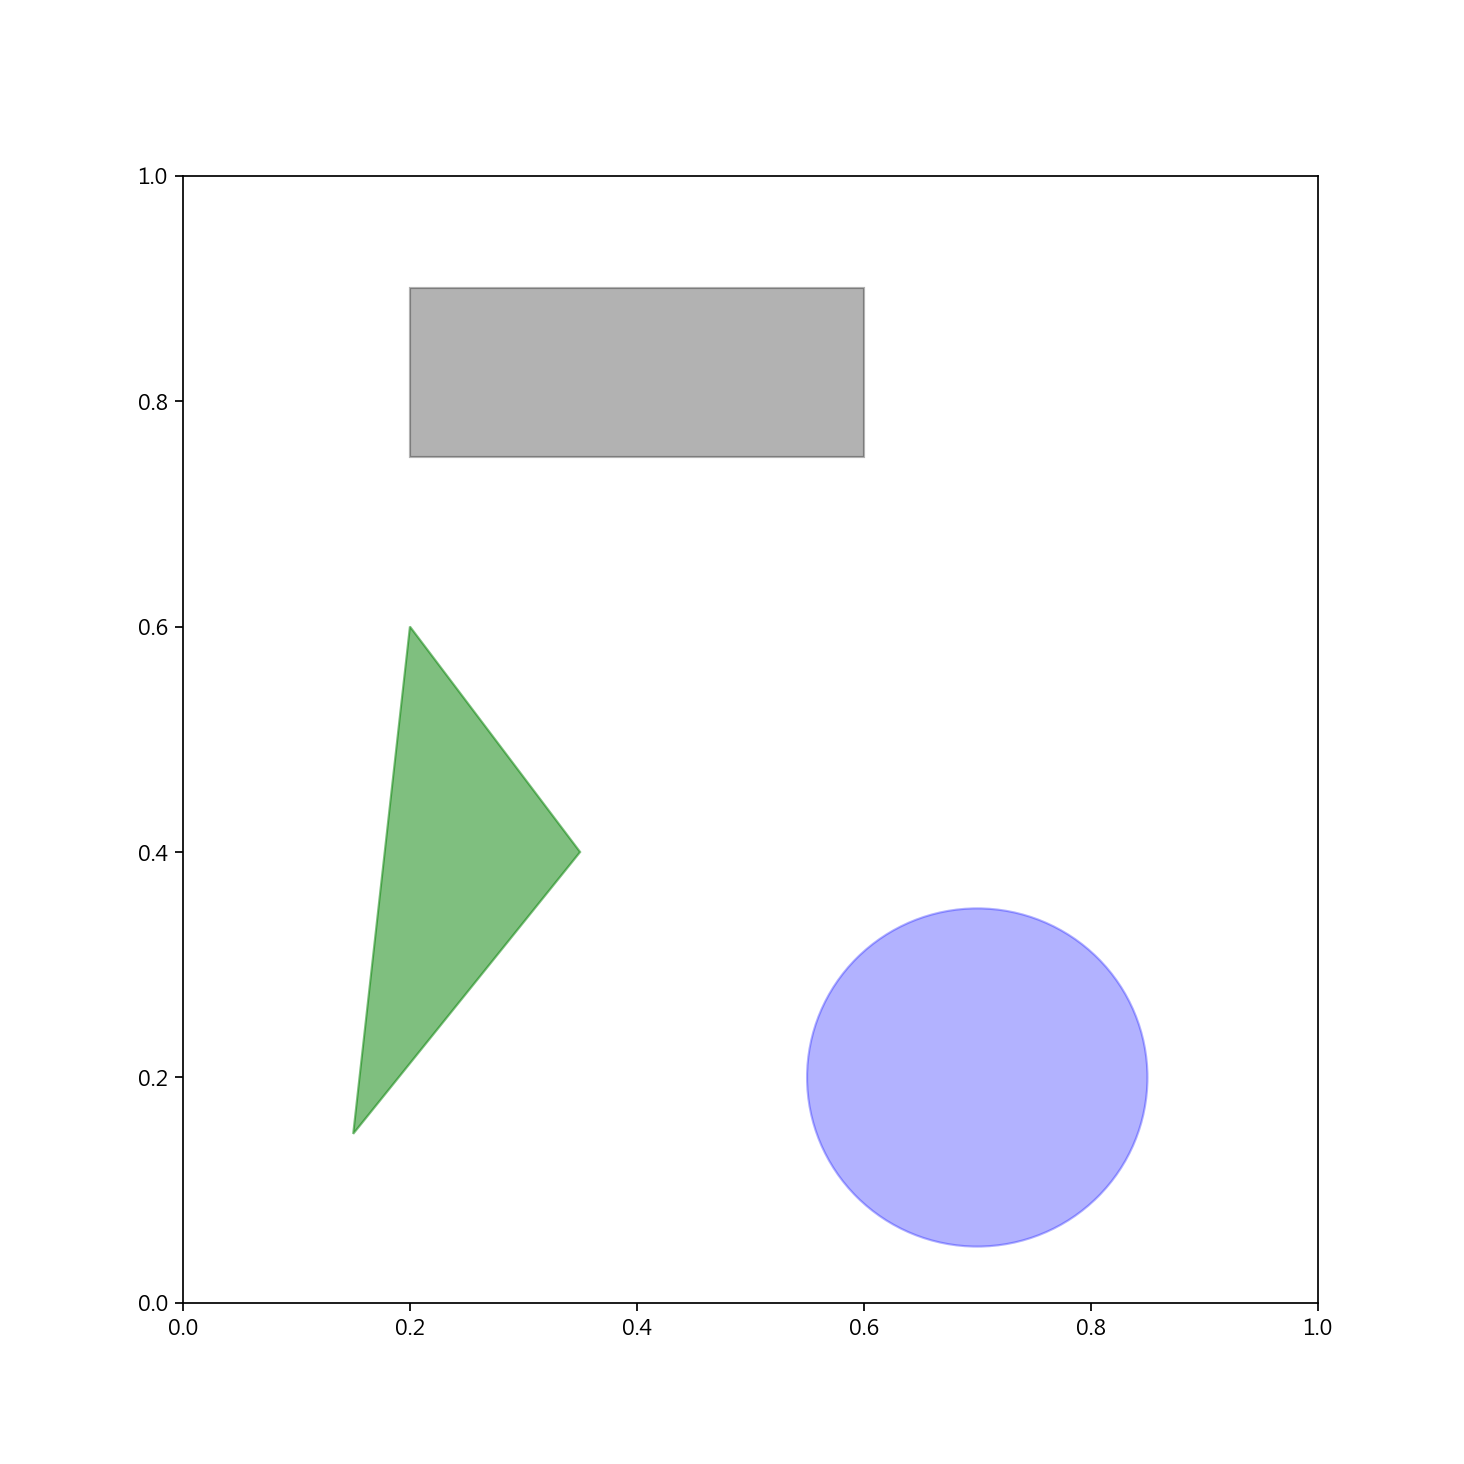

In [70]:
fig = plt.figure(figsize=(6, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) #Rectangle(xy, width, height, angle=0.0)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)   # look like oval is because figsize=(12, 6)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], # 3 points
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

<IPython.core.display.Javascript object>


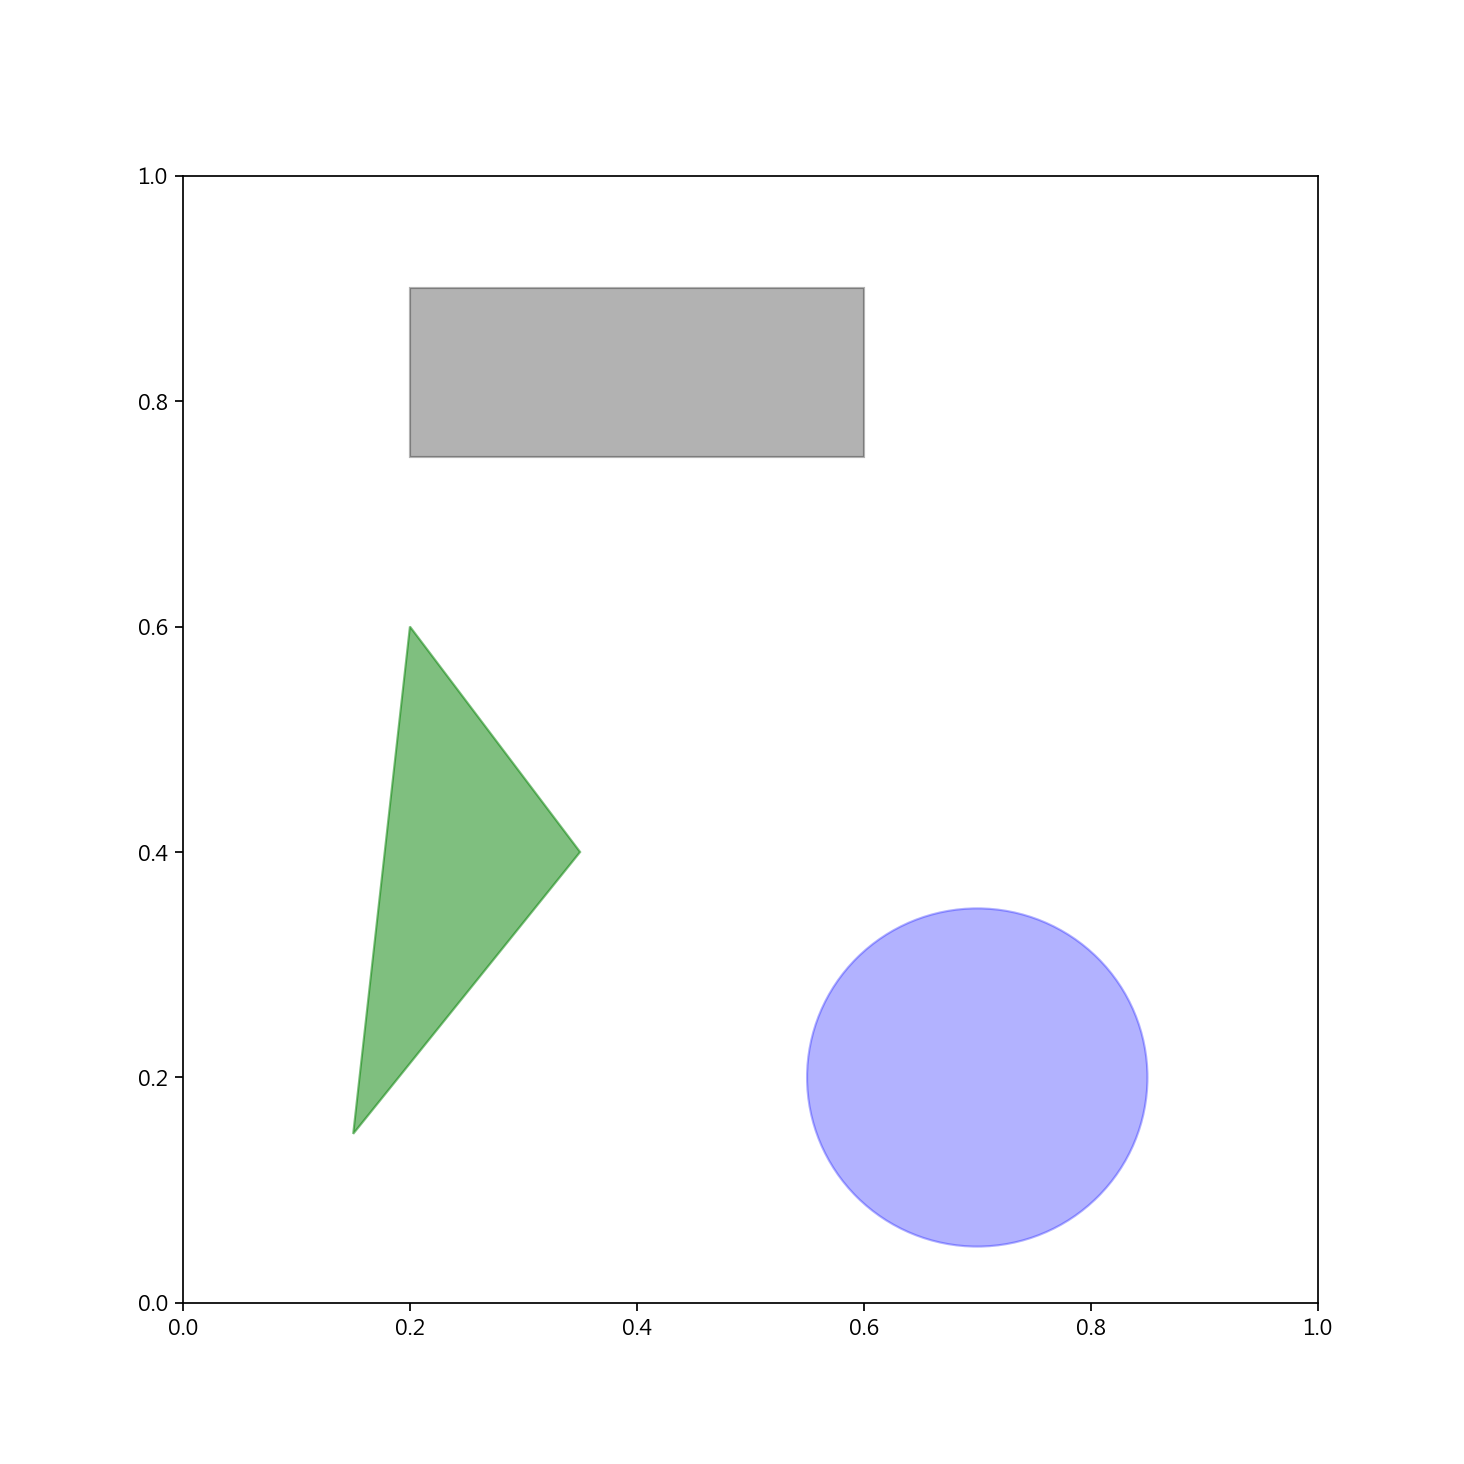

In [71]:
fig

In [72]:
plt.savefig('figpatch.png', dpi=400, bbox_inches='tight')

### §9.1.5 Saving Plots to File

You can save the active figure to file using plt.savefig. This method is equivalent to
the figure object’s savefig instance method
```python
plt.savefig('figpath.svg')
```

To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you
would do:
```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

savefig doesn’t have to write to disk; it can also write to any file-like object, such as a
BytesIO:

```python
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

<IPython.core.display.Javascript object>


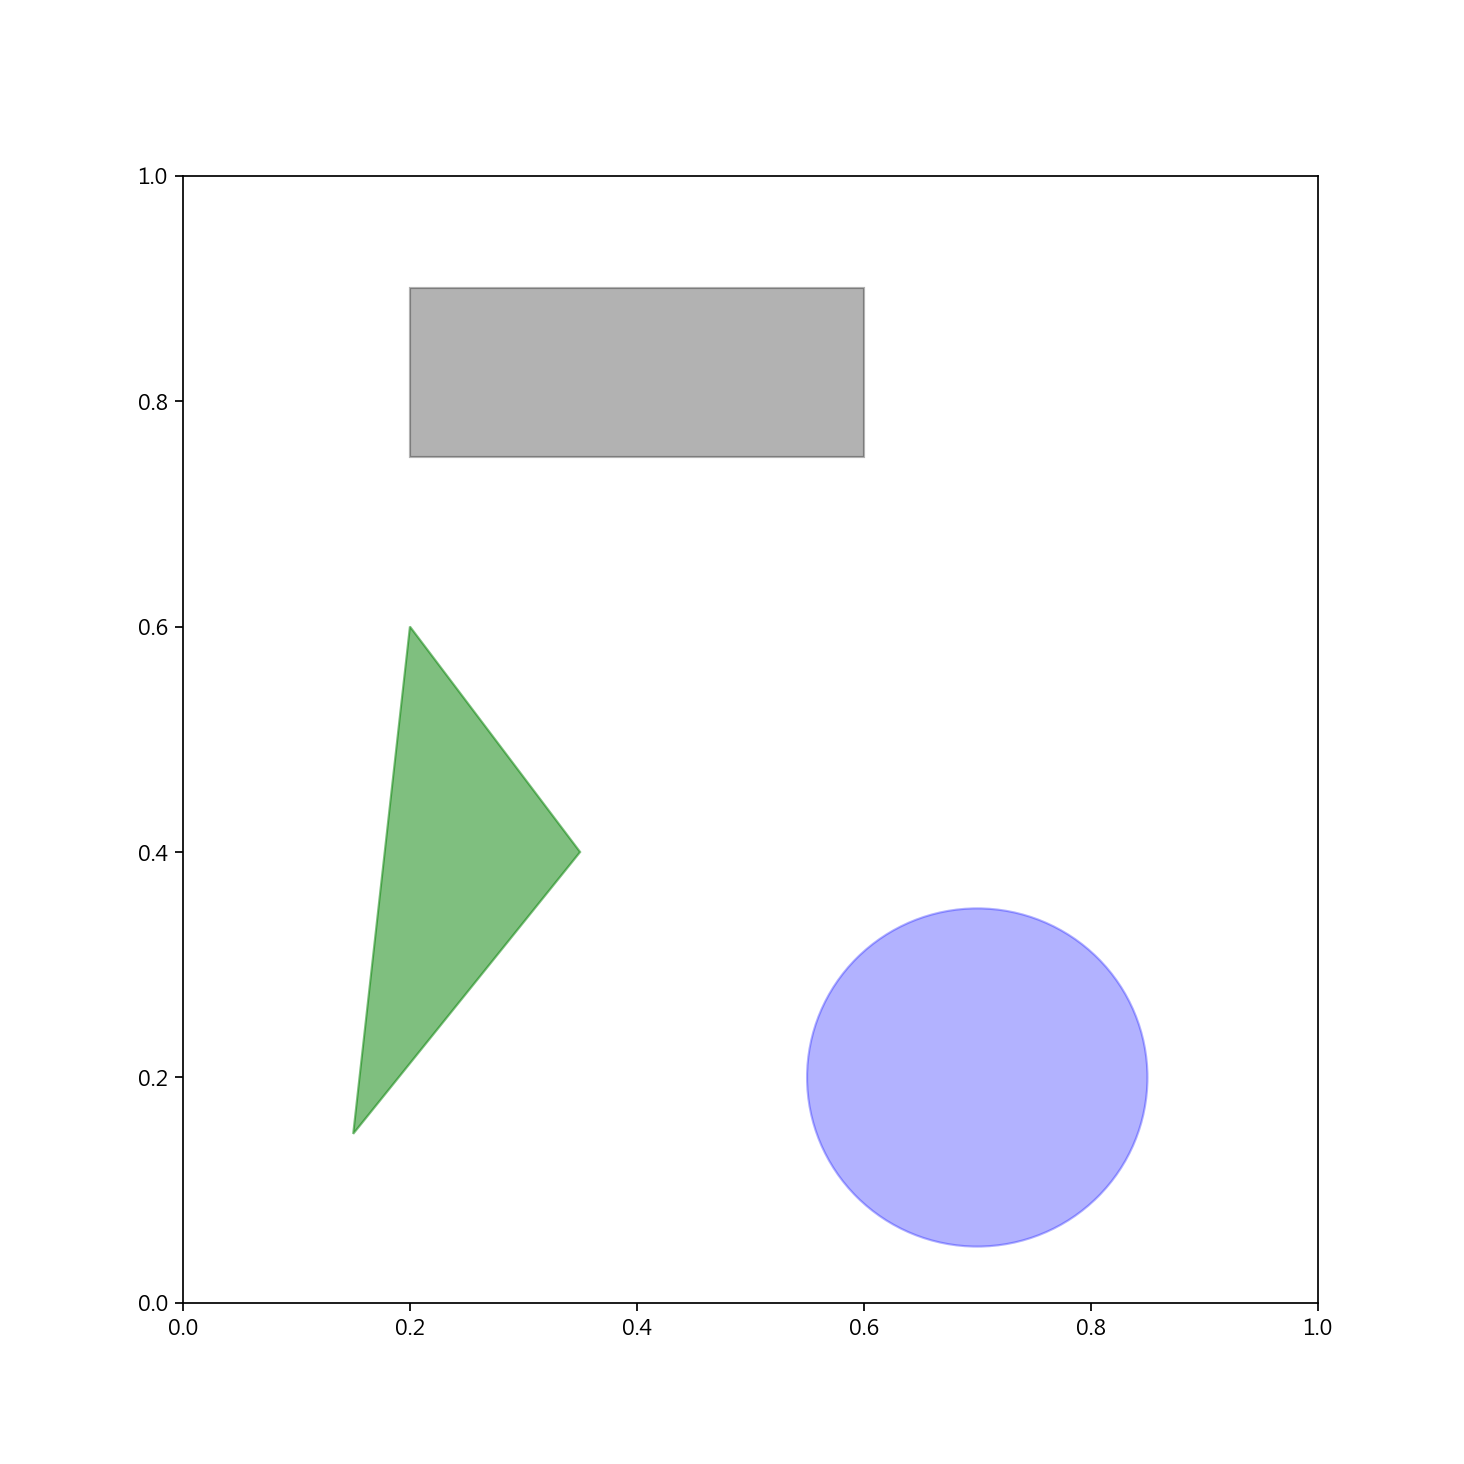

In [73]:
fig

In [74]:
plt.savefig('fig.svg')

### §9.1.6 matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily
toward preparing figures for publication.

Fortunately, nearly all of the default
behavior can be customized via an extensive set of global parameters governing figure
size, subplot spacing, colors, font sizes, grid styles, and so on

The first argument to rc is the component you wish to customize, such as 'figure',
'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. 
```python
plt.rc('figure', figsize=(10, 10))
```

After that can follow a sequence of keyword arguments indicating the new parameters.
```python
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

In [77]:
# plt.rcParams?

## §9.2 Plotting with pandas and seaborn

pandas itself has built-in methods that simplify creating visualizations from Data‐
Frame and Series objects. Another library is seaborn, a statistical graphics library created
by Michael Waskom. Seaborn simplifies creating many common visualization
types.

-	Line Plots
-	Bar Plots
-	Histograms and Density Plots
-	Scatter or Point Plots
-	Facet Grids and Categorical Data

### ※ 你不需要特別引用 seaborn API
Importing seaborn modifies the default matplotlib color schemes
and plot styles to improve readability and aesthetics.

### §9.2.1 Line Plots (折線圖)

In [78]:
plt.close('all')

In [79]:
# %matplotlib auto

In [80]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -1.697134
10   -1.465386
20   -1.130972
30   -1.238817
40   -2.132349
50   -5.009765
60   -5.370461
70   -4.665128
80   -6.335397
90   -7.176903
dtype: float64

In [81]:
# s.plot?

In [82]:
# plt?

<IPython.core.display.Javascript object>


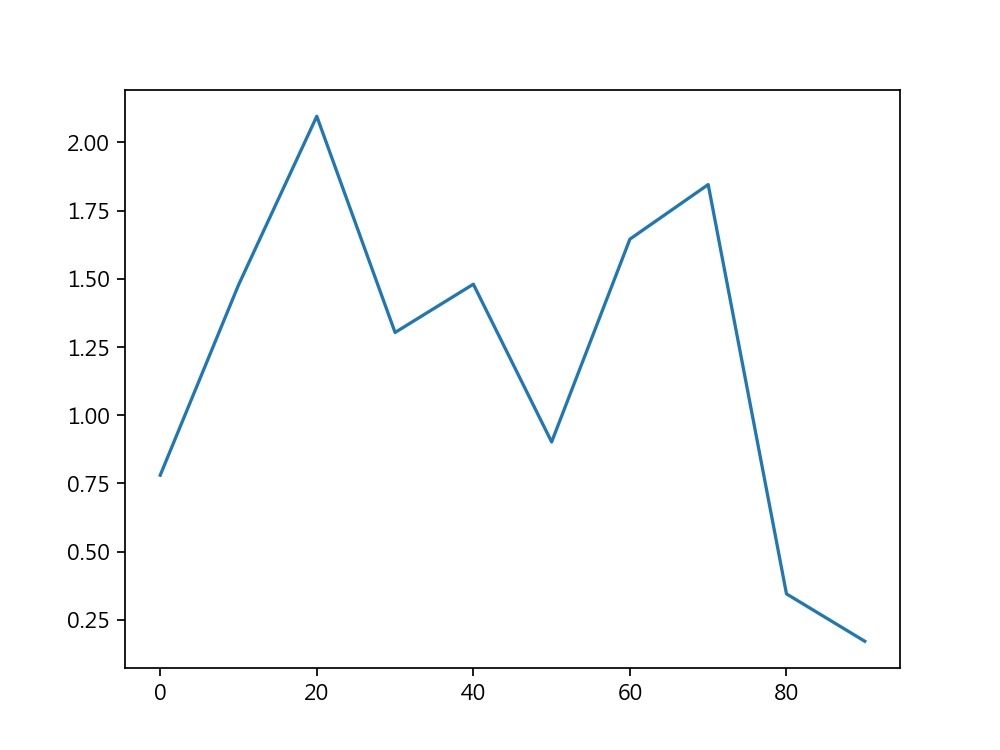

<AxesSubplot:>

In [83]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [84]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), # cumsum(0) sum by row
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

A         B         C         D
0   0.814674 -1.159004  0.206599 -0.612438
10  0.051274 -1.035237  2.911938 -0.769710
20  1.245024 -0.444633  2.527543  0.494052
30  1.004656  0.052041  2.741461  1.185209
40  1.426267 -0.840301  2.136028  2.090076
50  2.098007 -1.547824  3.922315  2.279517
60  2.556945 -2.321499  5.817501  2.444514
70  3.052082 -1.194473  5.152751  3.488853
80  4.012034 -0.862683  4.673254  1.669761
90  5.497664  0.706666  3.985414  3.089928

<IPython.core.display.Javascript object>


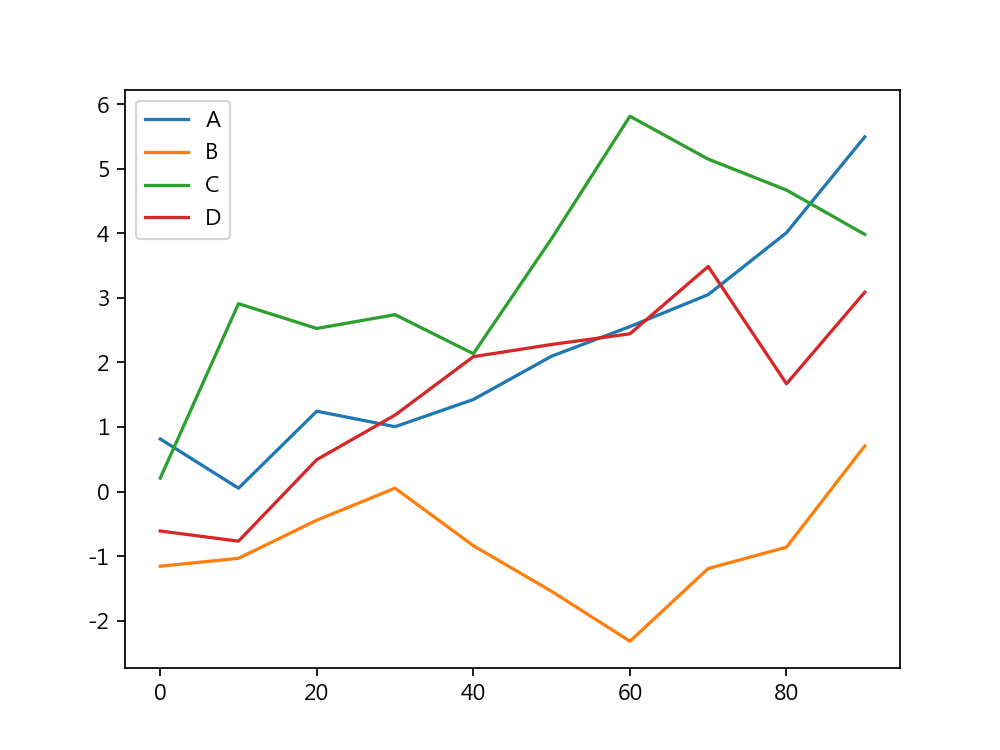

<AxesSubplot:>

In [85]:
# The plot attribute contains a “family” of methods for different plot types
df.plot()

In [86]:
plt.close("all")

### §9.2.2 Bar Plots (長條圖)

<IPython.core.display.Javascript object>


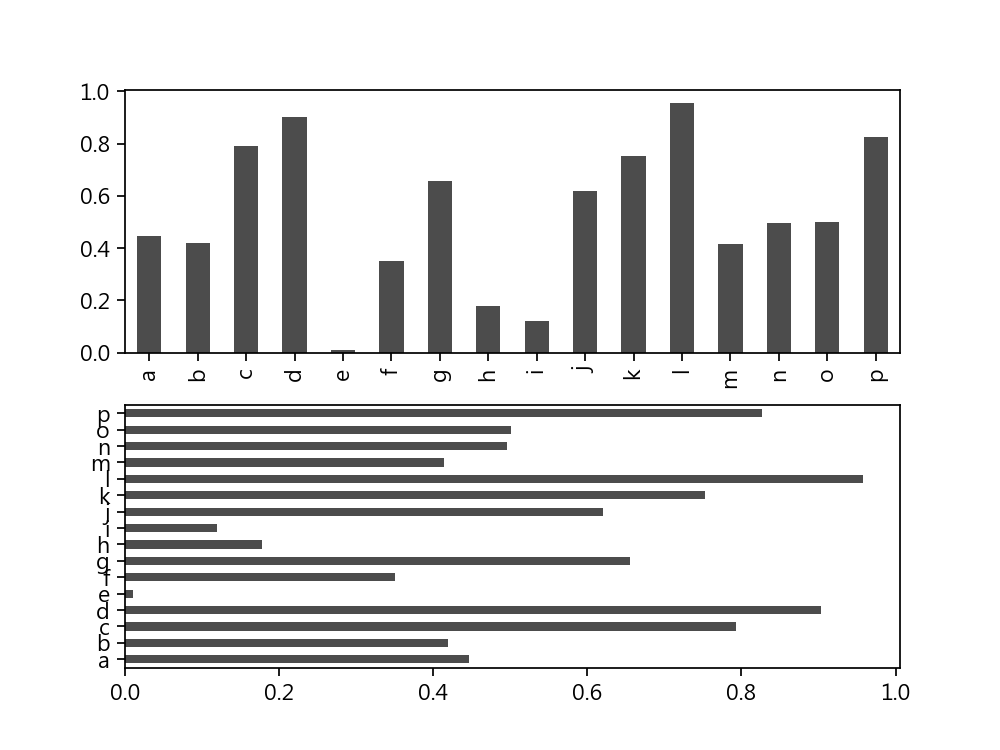

<AxesSubplot:>

In [87]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [88]:
np.random.seed(12348)

In [89]:
# DataFrame’s plot method plots each of its columns as a different line on the same
# subplot, creating a legend automatically

df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus         A         B         C         D
one    0.370670  0.602792  0.229159  0.486744
two    0.420082  0.571653  0.049024  0.880592
three  0.814568  0.277160  0.880316  0.431326
four   0.374020  0.899420  0.460304  0.100843
five   0.433270  0.125107  0.494675  0.961825
six    0.601648  0.478576  0.205690  0.560547

<IPython.core.display.Javascript object>


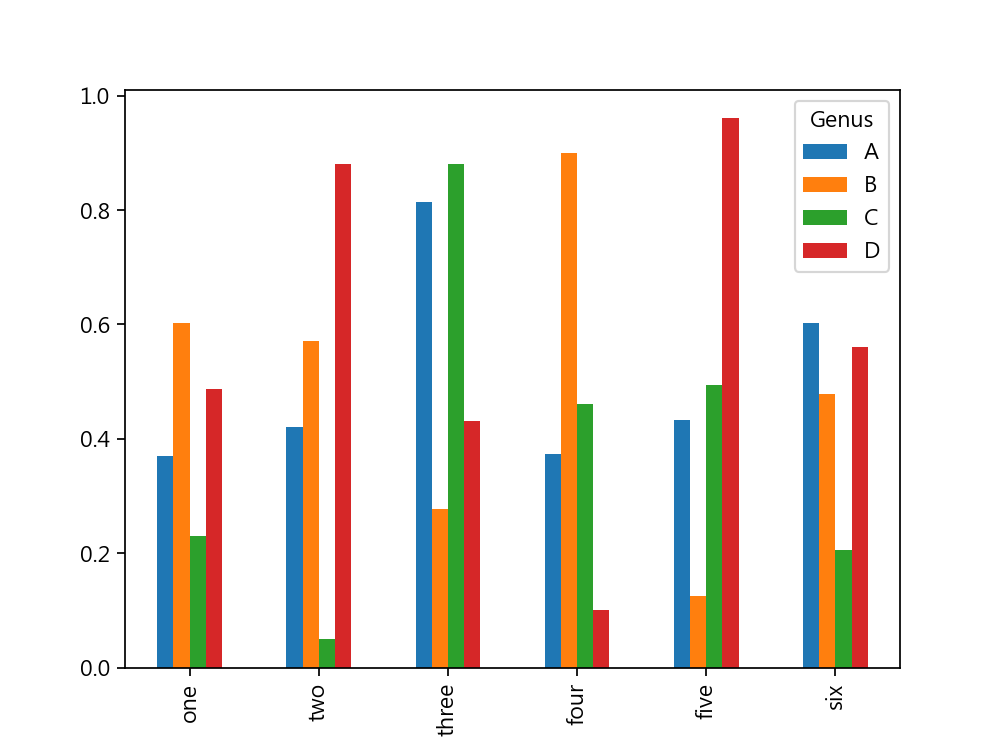

<AxesSubplot:>

In [90]:
df.plot.bar()

In [91]:
plt.close("all")

<IPython.core.display.Javascript object>


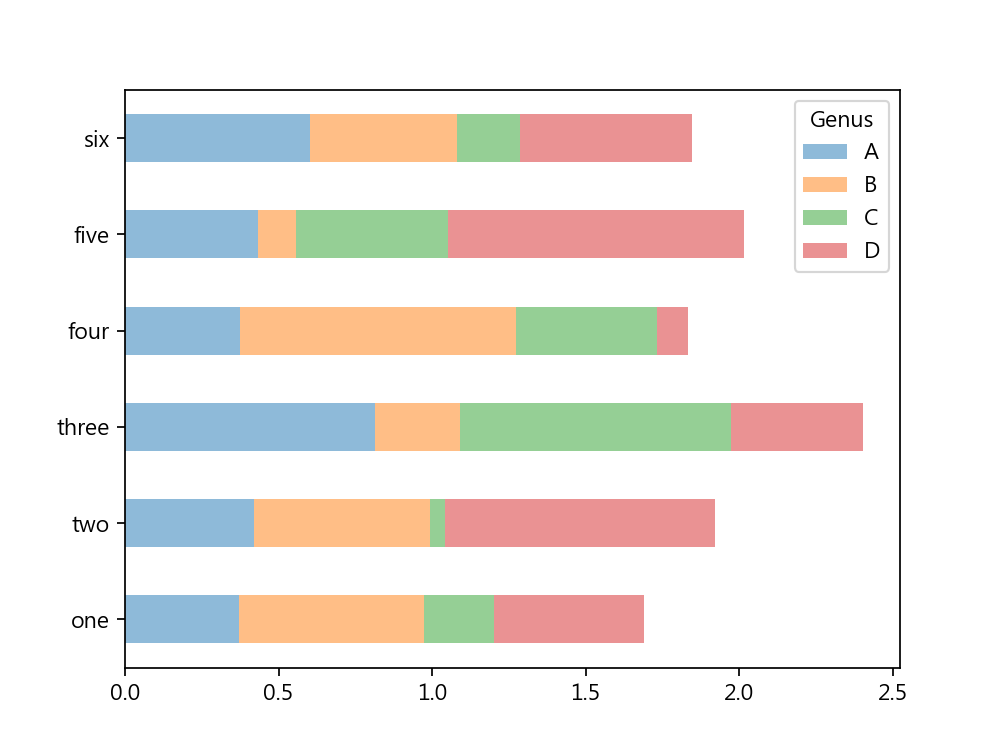

<AxesSubplot:>

In [94]:
# plt.figure()
df.plot.barh(stacked=True, alpha=0.5)
# df.plot.barh(alpha=0.5)

In [95]:
plt.close('all')

In [96]:
tips = pd.read_csv('examples/tips.csv')
tips

total_bill   tip smoker   day    time  size
0         16.99  1.01     No   Sun  Dinner     2
1         10.34  1.66     No   Sun  Dinner     3
2         21.01  3.50     No   Sun  Dinner     3
3         23.68  3.31     No   Sun  Dinner     2
4         24.59  3.61     No   Sun  Dinner     4
..          ...   ...    ...   ...     ...   ...
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2

[244 rows x 6 columns]

In [97]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size']) # crosstab => computes a frequency table of factors
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [98]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size   2   3   4  5
day                
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3
Thur  48   4   5  1

In [ ]:
# party_counts.sum(0)

In [99]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [100]:
# party_counts.div?

In [101]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

<IPython.core.display.Javascript object>


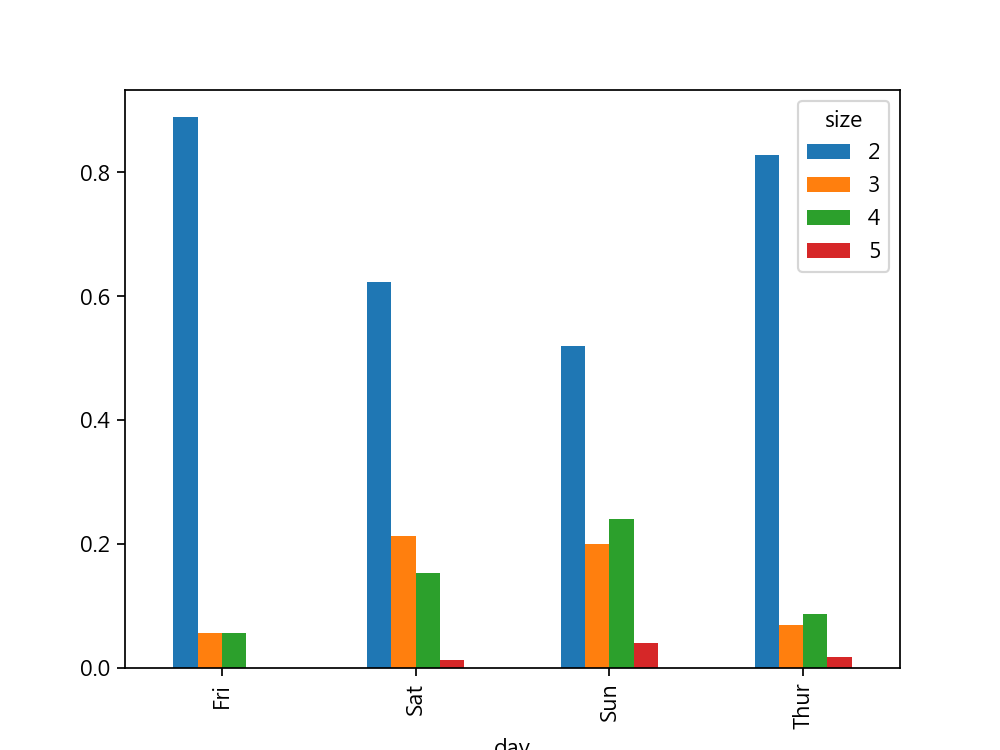

<AxesSubplot:xlabel='day'>

In [102]:
party_pcts.plot.bar()

In [103]:
plt.close('all')

In [104]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips

total_bill   tip smoker   day    time  size   tip_pct
0         16.99  1.01     No   Sun  Dinner     2  0.063204
1         10.34  1.66     No   Sun  Dinner     3  0.191244
2         21.01  3.50     No   Sun  Dinner     3  0.199886
3         23.68  3.31     No   Sun  Dinner     2  0.162494
4         24.59  3.61     No   Sun  Dinner     4  0.172069
..          ...   ...    ...   ...     ...   ...       ...
239       29.03  5.92     No   Sat  Dinner     3  0.256166
240       27.18  2.00    Yes   Sat  Dinner     2  0.079428
241       22.67  2.00    Yes   Sat  Dinner     2  0.096759
242       17.82  1.75     No   Sat  Dinner     2  0.108899
243       18.78  3.00     No  Thur  Dinner     2  0.190114

[244 rows x 7 columns]

## 是否可以給我統計後的數字

<IPython.core.display.Javascript object>


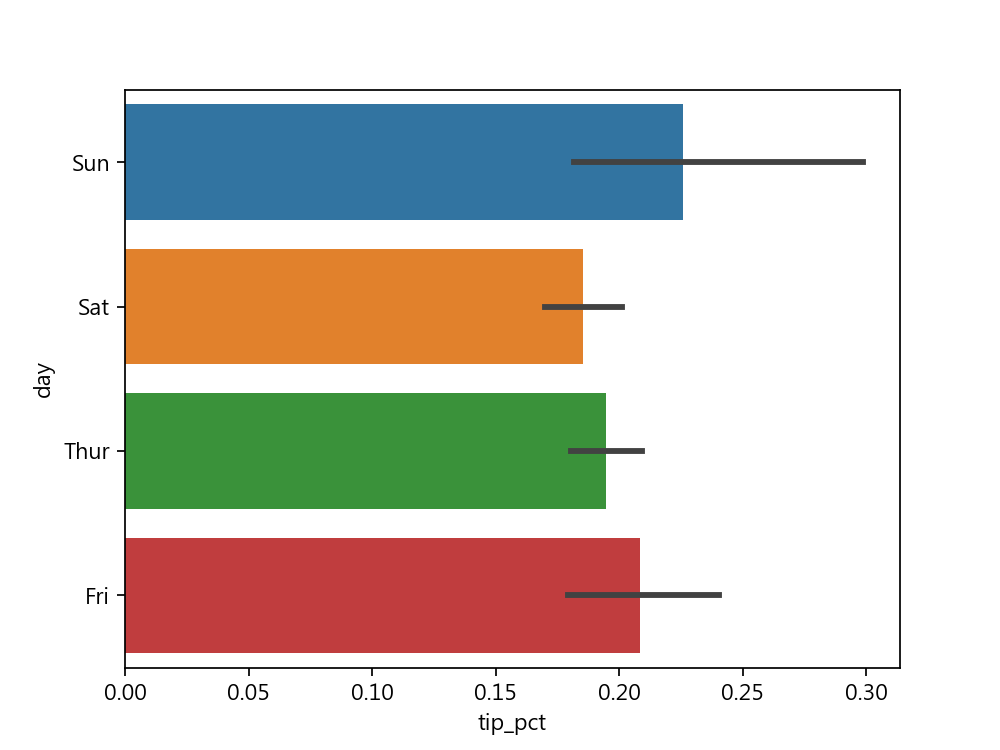

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [105]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', ci=95)

In [106]:
plt.close('all')

<IPython.core.display.Javascript object>


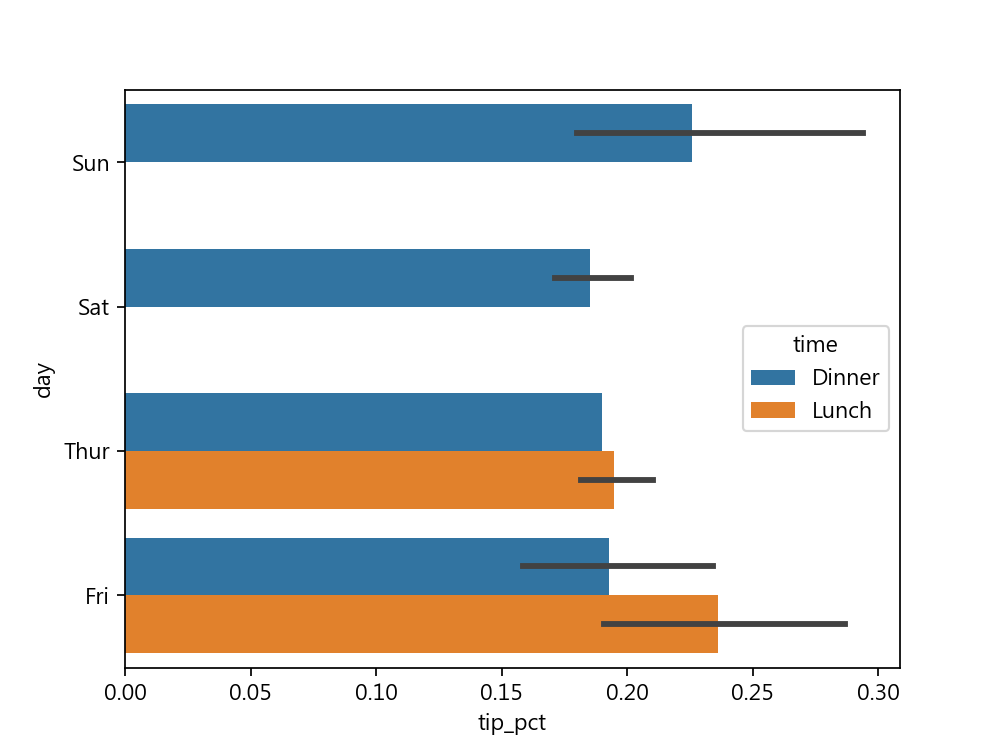

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [107]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [108]:
plt.close('all')

In [109]:
sns.set(style="whitegrid")

<IPython.core.display.Javascript object>


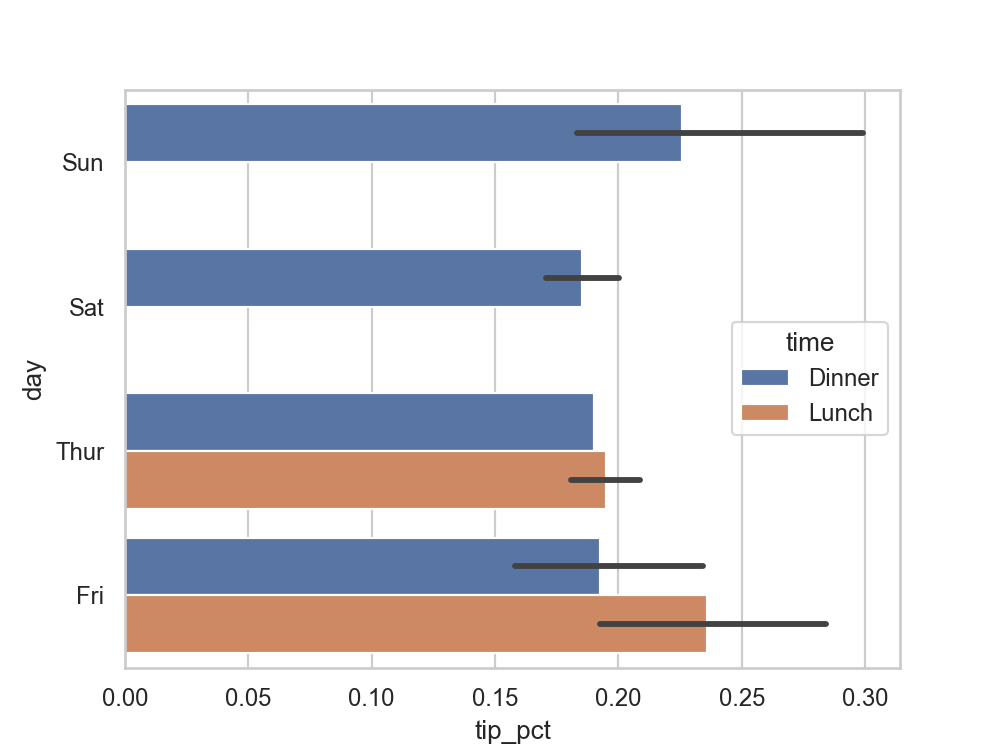

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [110]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [111]:
plt.close("all")

### §9.2.3 Histograms (直方圖) and Density Plots (密度圖)

<IPython.core.display.Javascript object>


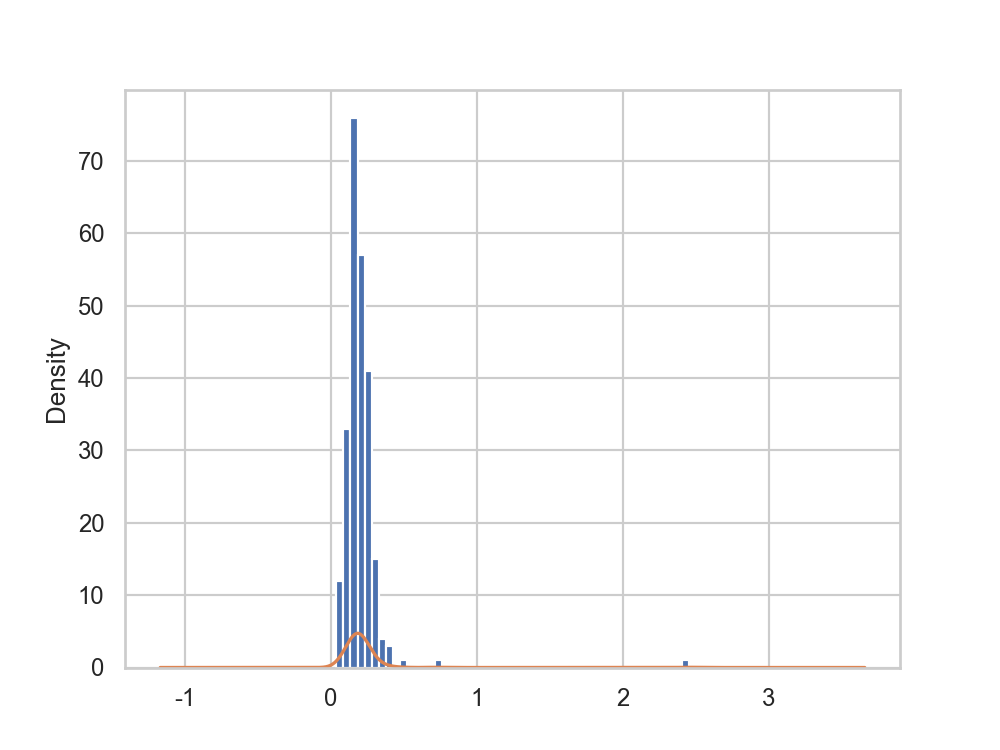

<AxesSubplot:ylabel='Frequency'>

In [114]:
plt.figure()

tips['tip_pct'].plot.hist(bins=50) # 50 segment

In [ ]:
plt.figure()

tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


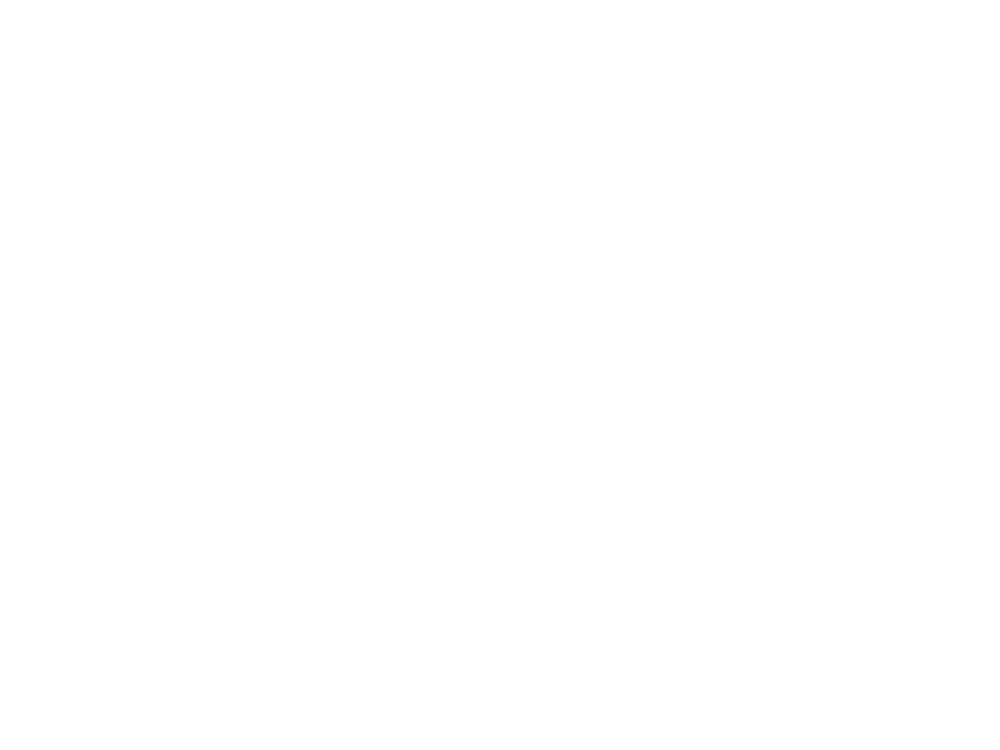

<IPython.core.display.Javascript object>


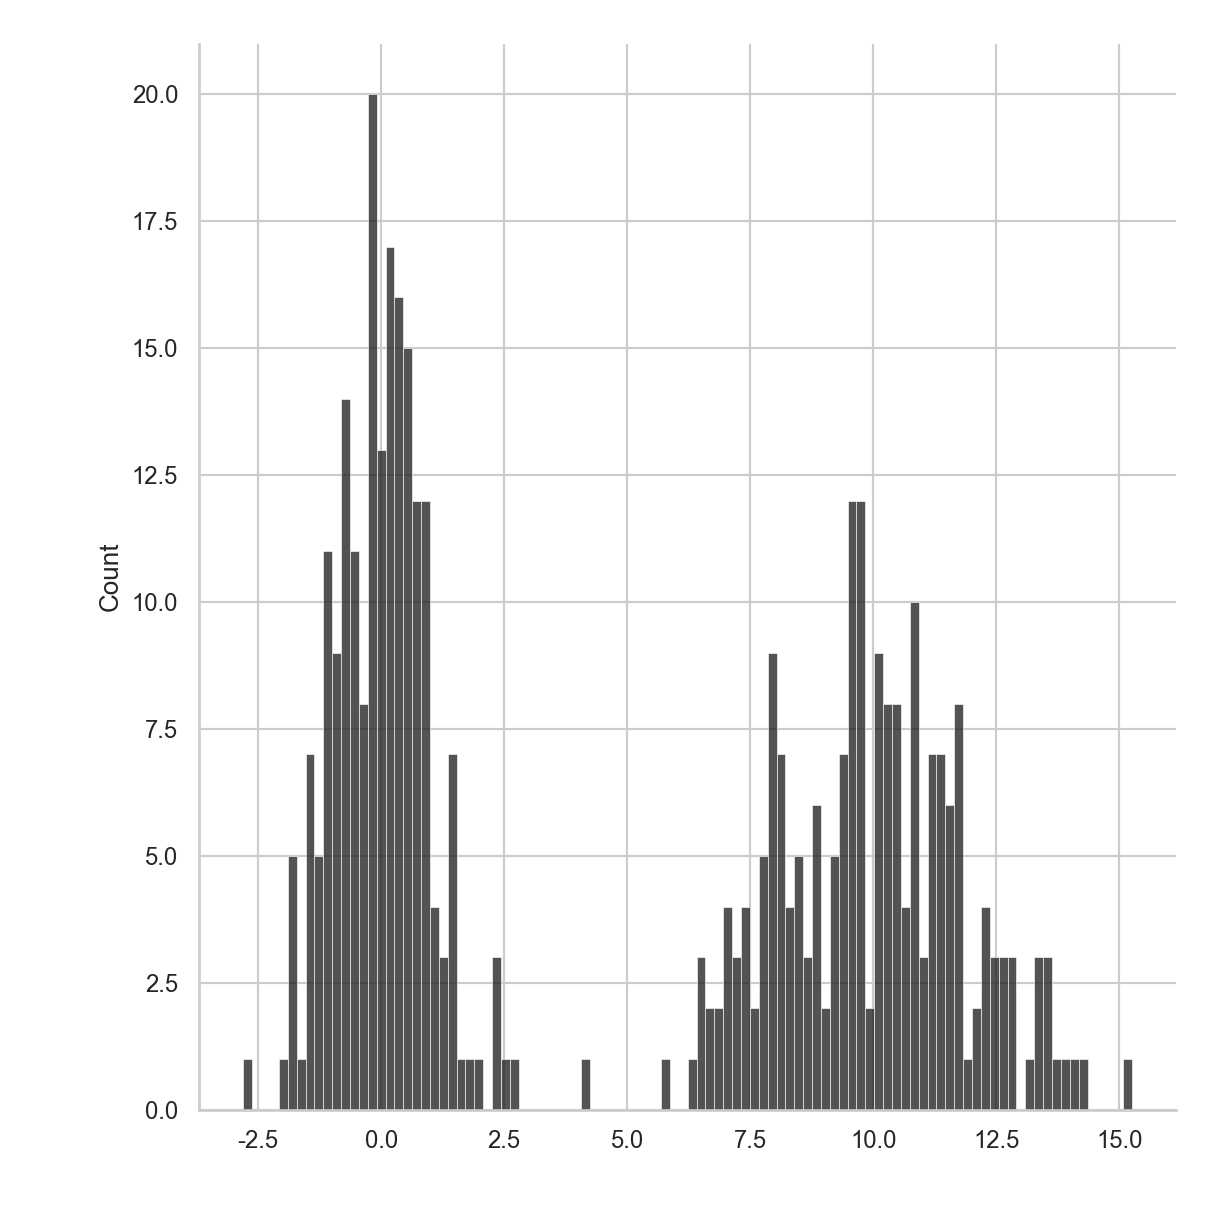

In [118]:
plt.figure()

comp1 = np.random.normal(0, 1, size=200) # random.normal(loc=0.0, scale=1.0, size=None) loc => Mean (“centre”) of the distribution
comp2 = np.random.normal(10, 2, size=200)                                              #scale => Standard deviation
values = pd.Series(np.concatenate([comp1, comp2]))
sns.displot(values, bins=100, color='k')

In [119]:
plt.close("all")

### §9.2.4 Scatter (散佈圖) or Point Plots (稱點圖)

In [120]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [121]:
# macro.head()

In [122]:
data

cpi      m1  tbilrate  unemp
0     28.980   139.7      2.82    5.8
1     29.150   141.7      3.08    5.1
2     29.350   140.5      3.82    5.3
3     29.370   140.0      4.33    5.6
4     29.540   139.6      3.50    5.2
..       ...     ...       ...    ...
198  216.889  1474.7      1.17    6.0
199  212.174  1576.5      0.12    6.9
200  212.671  1592.8      0.22    8.1
201  214.469  1653.6      0.18    9.2
202  216.385  1673.9      0.12    9.6

[203 rows x 4 columns]

In [123]:
np.log(data).diff()

cpi        m1  tbilrate     unemp
0         NaN       NaN       NaN       NaN
1    0.005849  0.014215  0.088193 -0.128617
2    0.006838 -0.008505  0.215321  0.038466
3    0.000681 -0.003565  0.125317  0.055060
4    0.005772 -0.002861 -0.212805 -0.074108
..        ...       ...       ...       ...
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

[203 rows x 4 columns]

In [124]:
trans_data = np.log(data).diff().dropna() # diff => out[i] = a[i+1] - a[i] 
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

In [125]:
trans_data[:5]

cpi        m1  tbilrate     unemp
1  0.005849  0.014215  0.088193 -0.128617
2  0.006838 -0.008505  0.215321  0.038466
3  0.000681 -0.003565  0.125317  0.055060
4  0.005772 -0.002861 -0.212805 -0.074108
5  0.000338  0.004289 -0.266946  0.000000

<IPython.core.display.Javascript object>


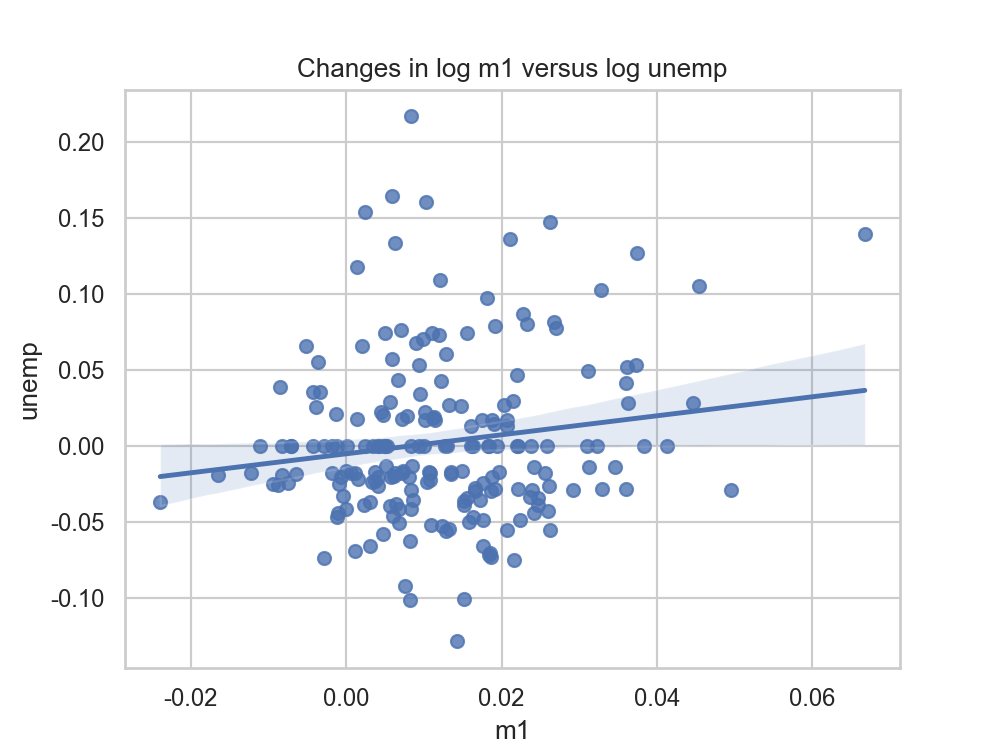

C:\Users\Public\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [126]:
plt.figure()

sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In [127]:
# sns.pairplot?

In [128]:
plt.close("all")

<IPython.core.display.Javascript object>


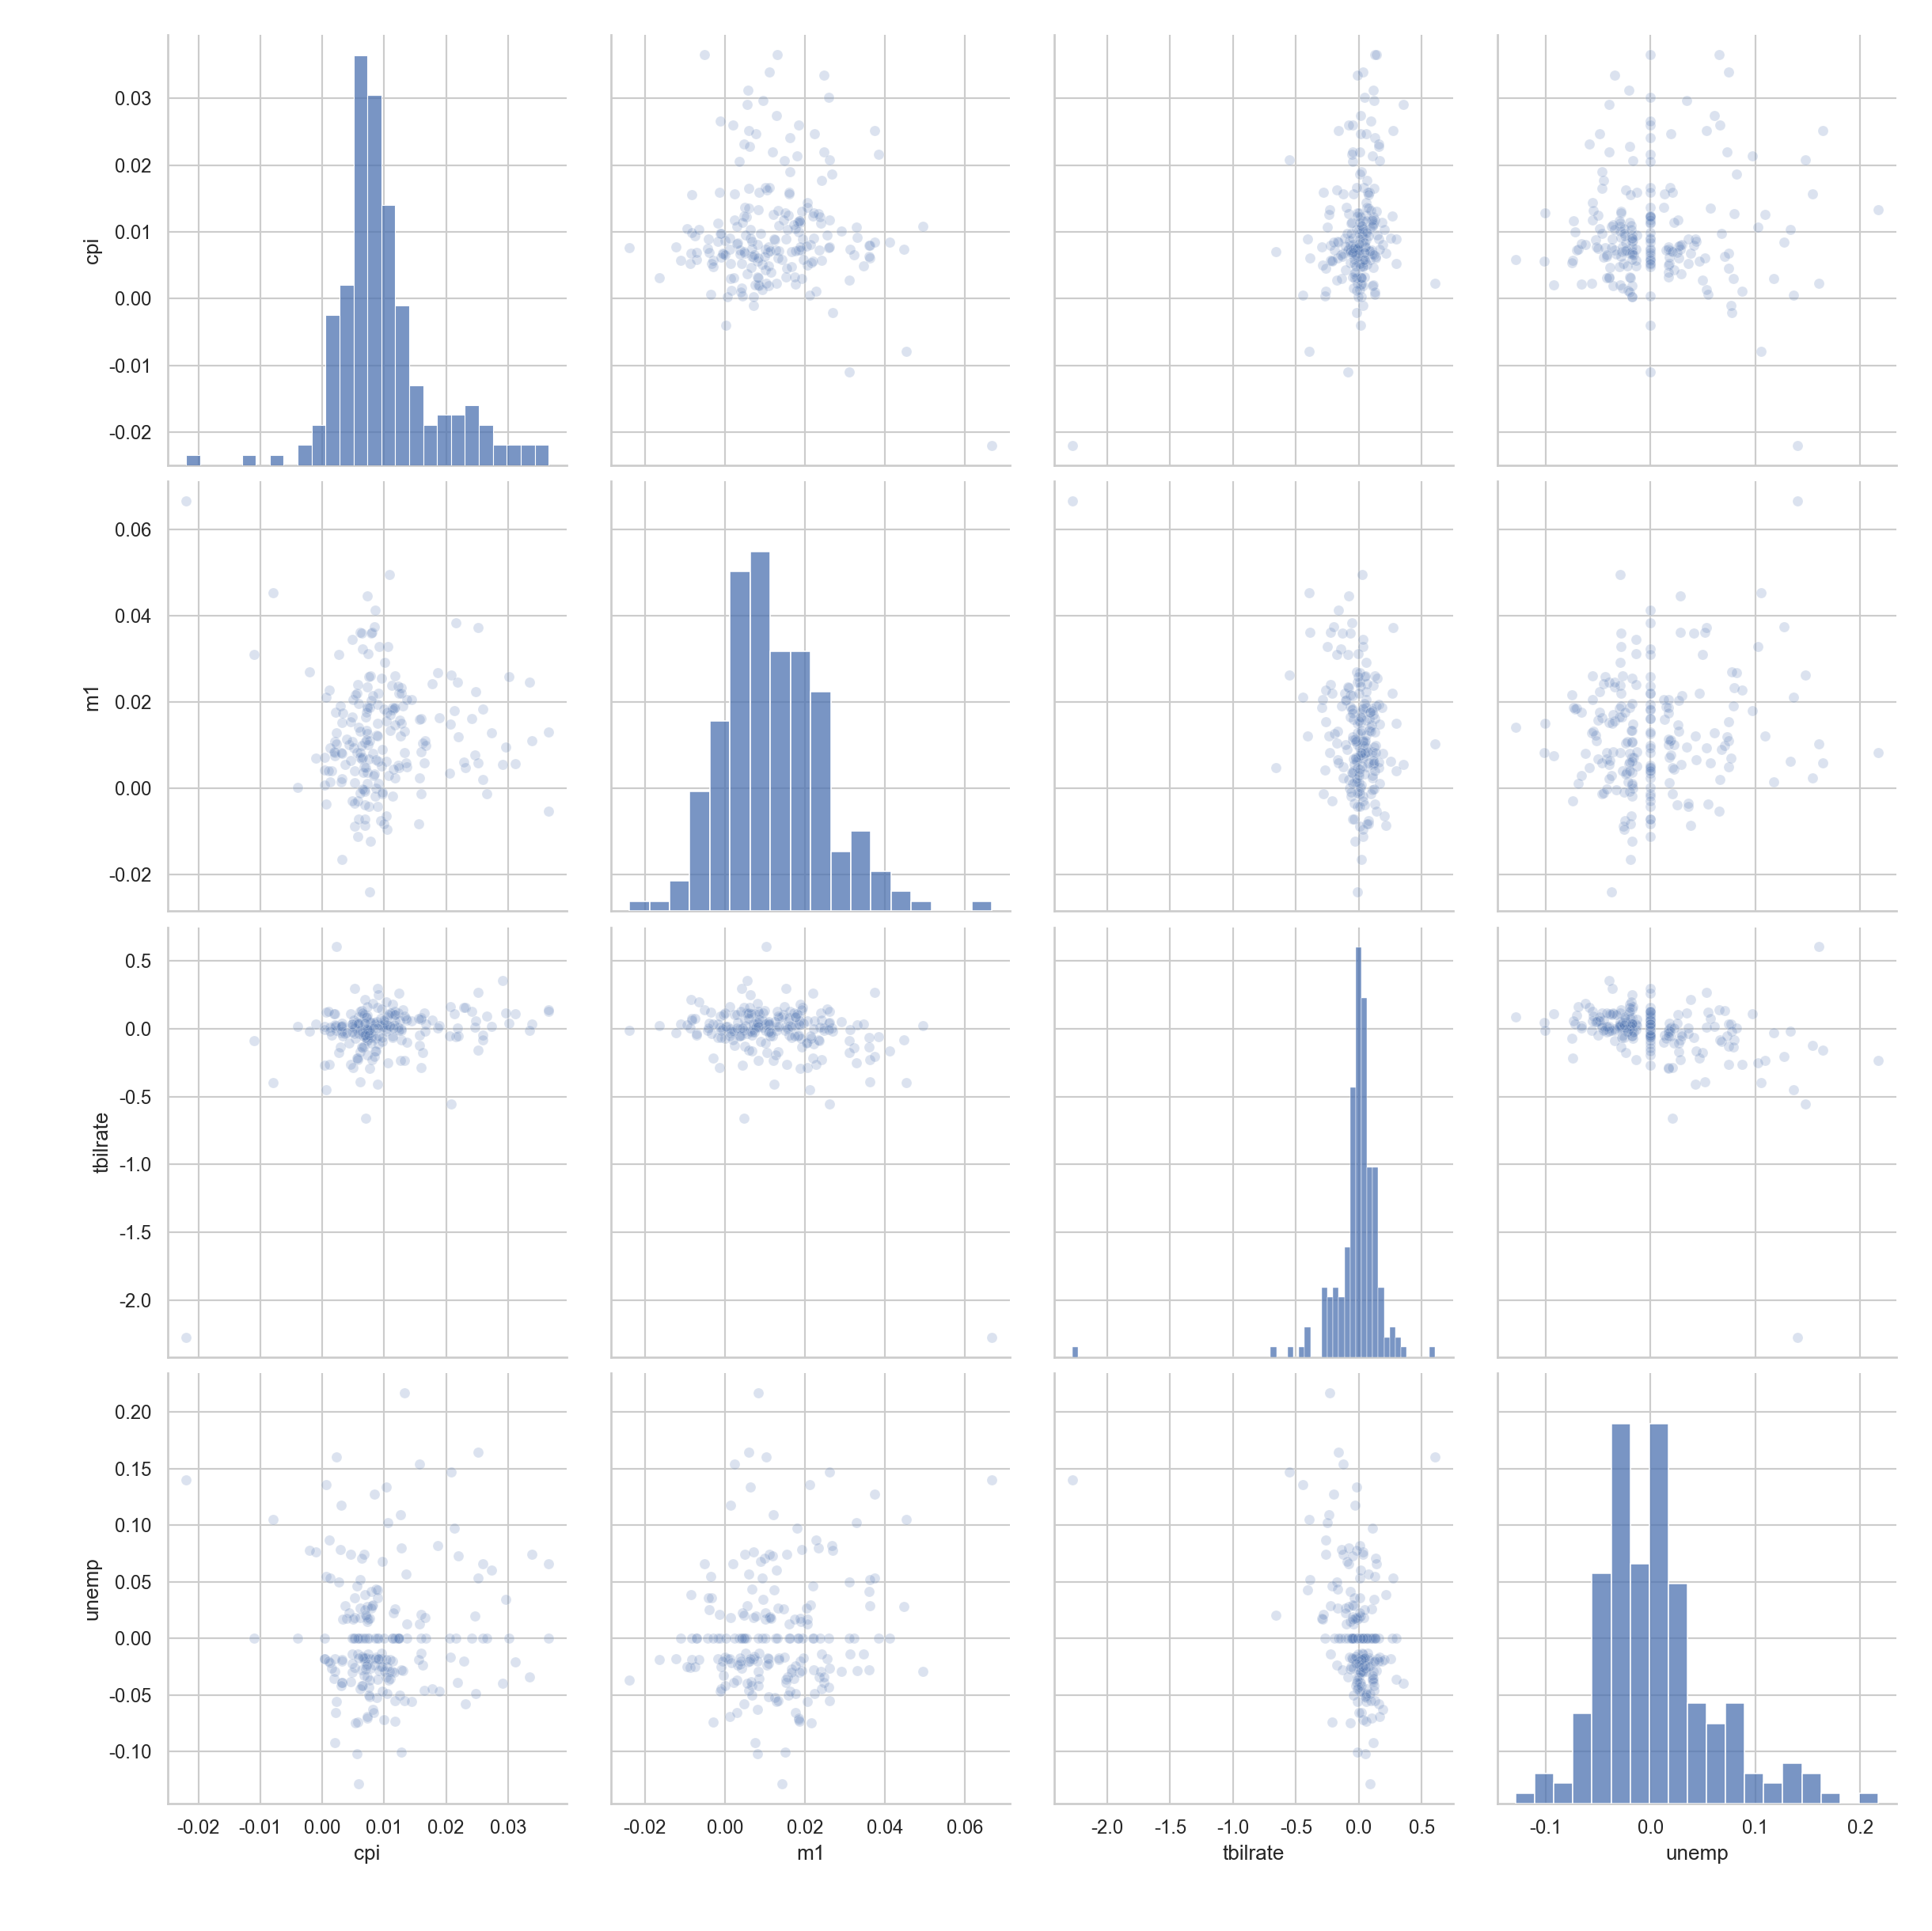

In [129]:
sns.pairplot(trans_data, plot_kws={'alpha': 0.2})

In [ ]:
plt.close("all")

### §9.2.5 Facet Grids (層面圖組) and Categorical Data (分組資料)

In [130]:
tips

total_bill   tip smoker   day    time  size   tip_pct
0         16.99  1.01     No   Sun  Dinner     2  0.063204
1         10.34  1.66     No   Sun  Dinner     3  0.191244
2         21.01  3.50     No   Sun  Dinner     3  0.199886
3         23.68  3.31     No   Sun  Dinner     2  0.162494
4         24.59  3.61     No   Sun  Dinner     4  0.172069
..          ...   ...    ...   ...     ...   ...       ...
239       29.03  5.92     No   Sat  Dinner     3  0.256166
240       27.18  2.00    Yes   Sat  Dinner     2  0.079428
241       22.67  2.00    Yes   Sat  Dinner     2  0.096759
242       17.82  1.75     No   Sat  Dinner     2  0.108899
243       18.78  3.00     No  Thur  Dinner     2  0.190114

[244 rows x 7 columns]

C:\Users\Public\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


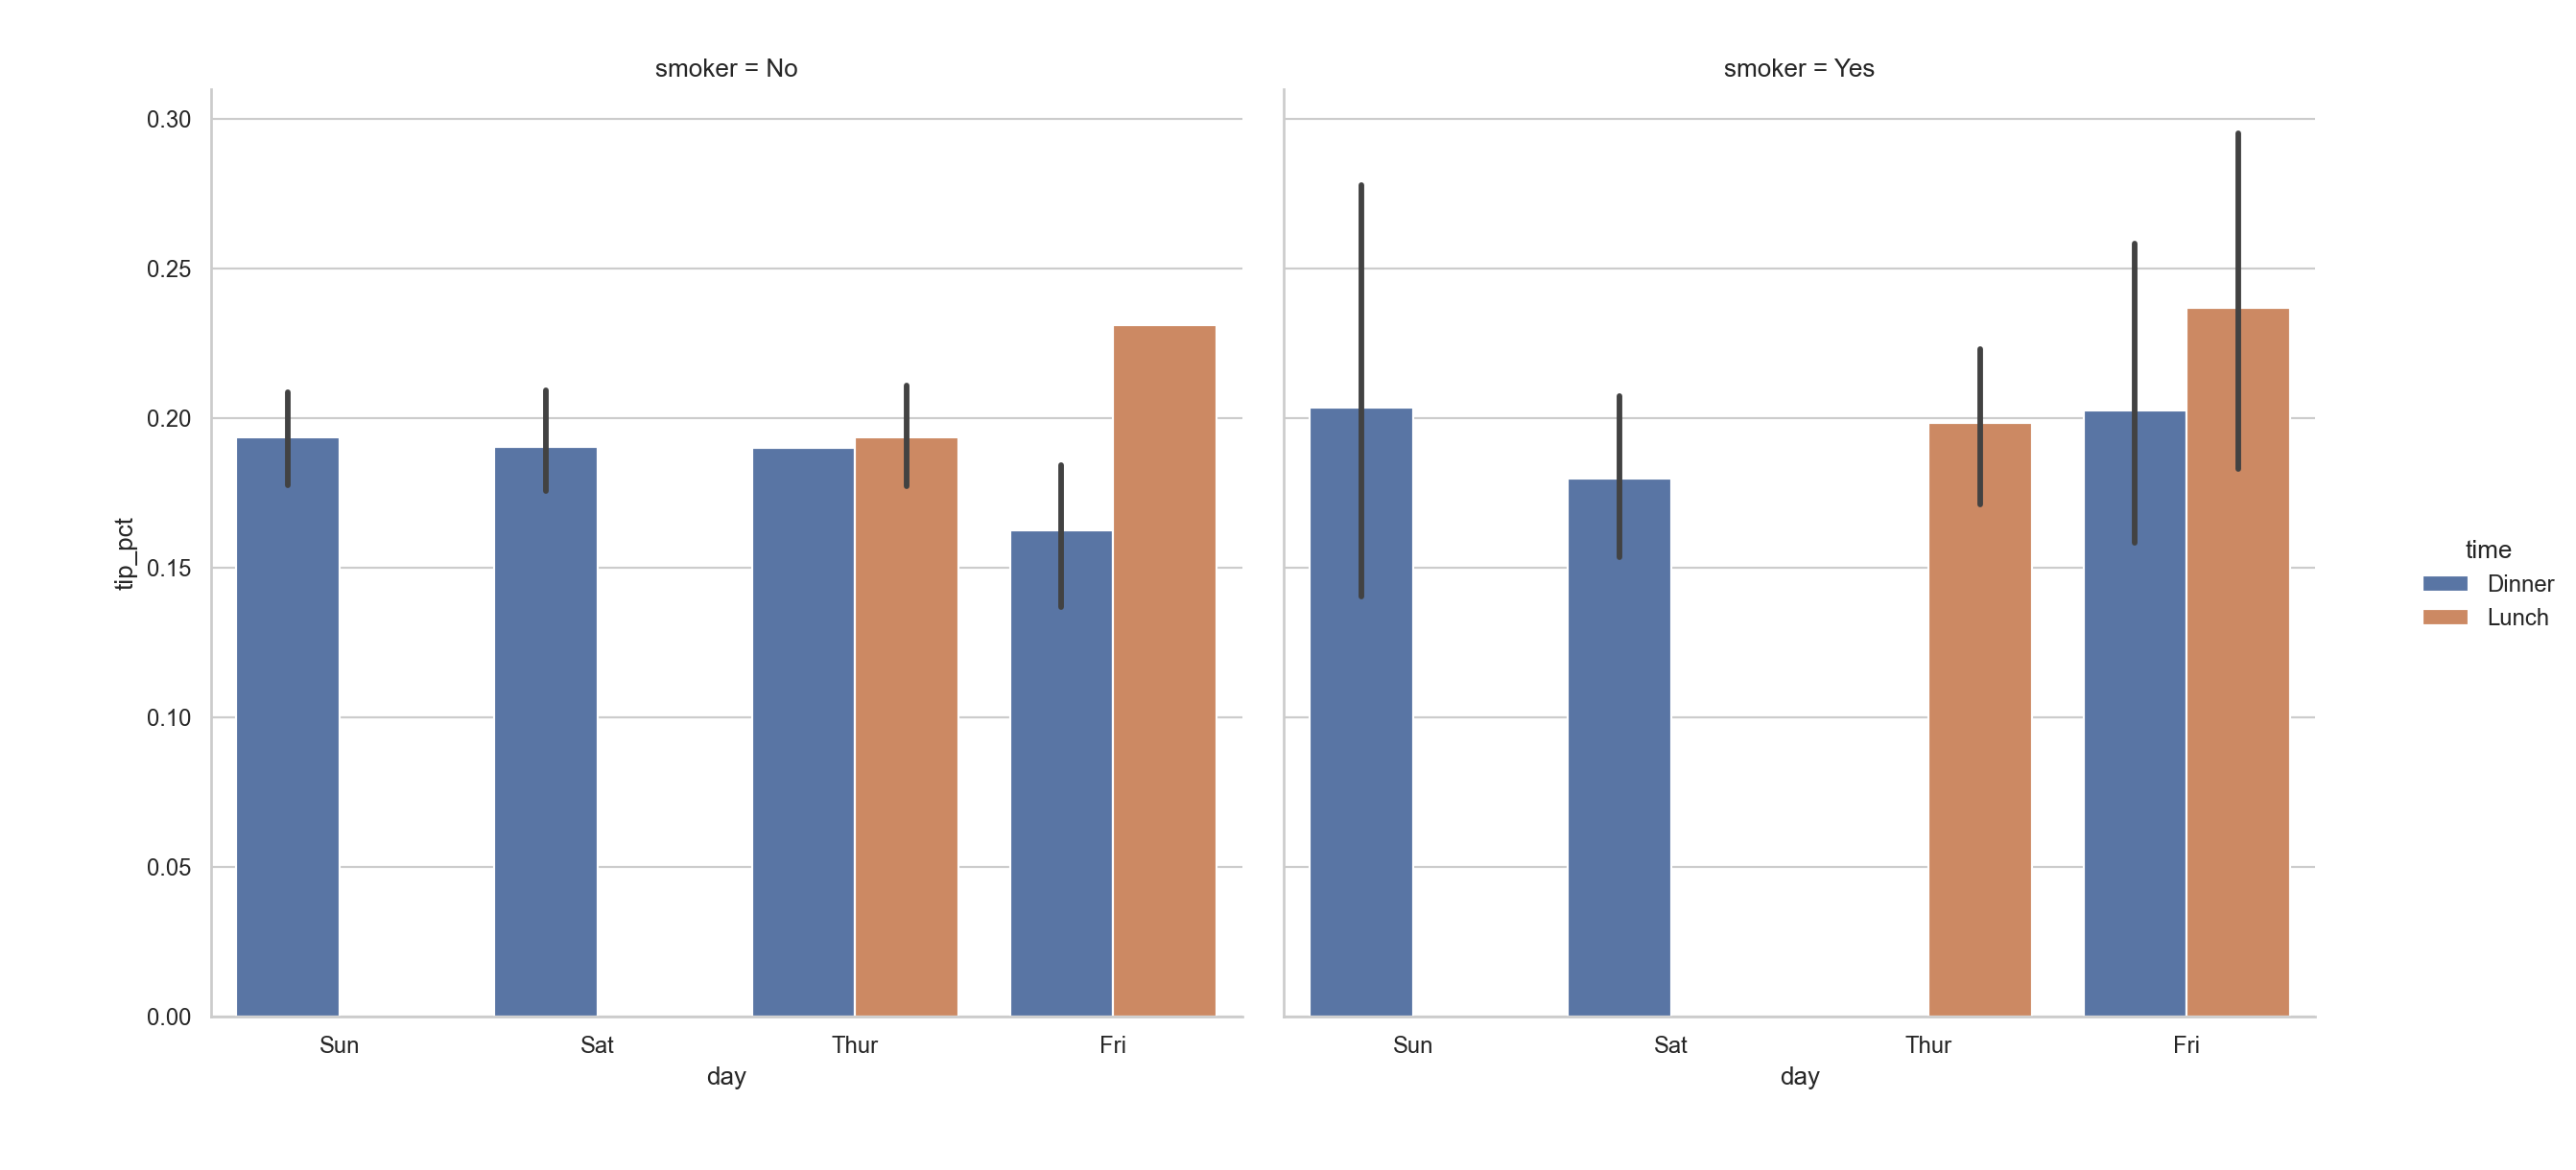

In [134]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [133]:
# plt.rc('figure', figsize=(6, 3.6))

In [135]:
plt.close(1)

<IPython.core.display.Javascript object>


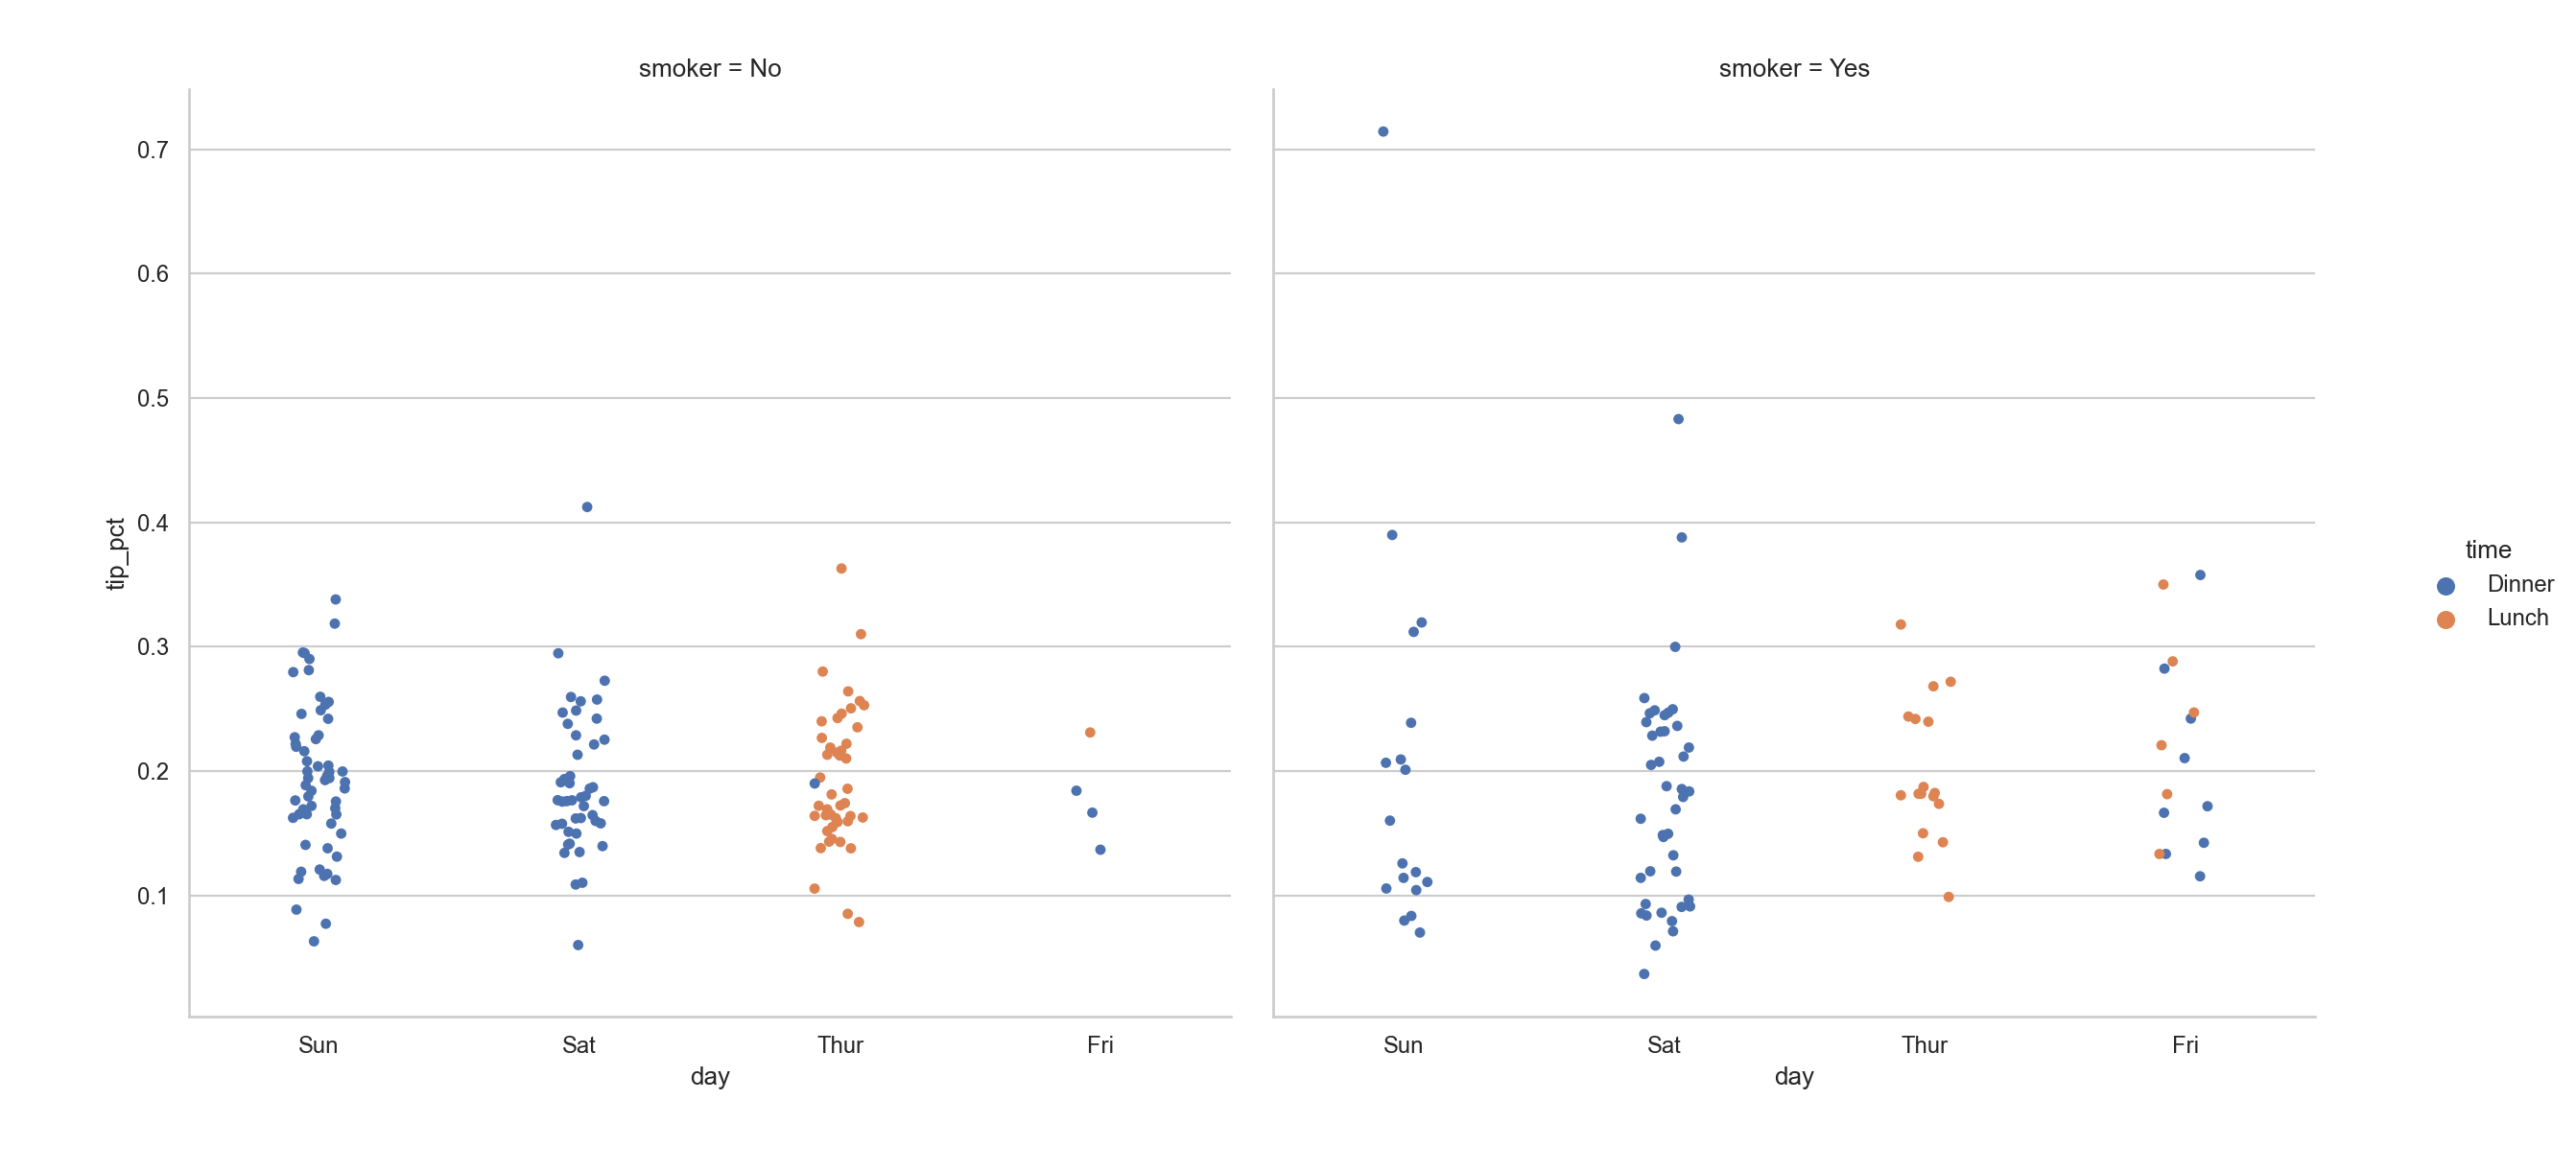

In [138]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
            kind='strip', data=tips[tips.tip_pct < 1])

C:\Users\Public\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


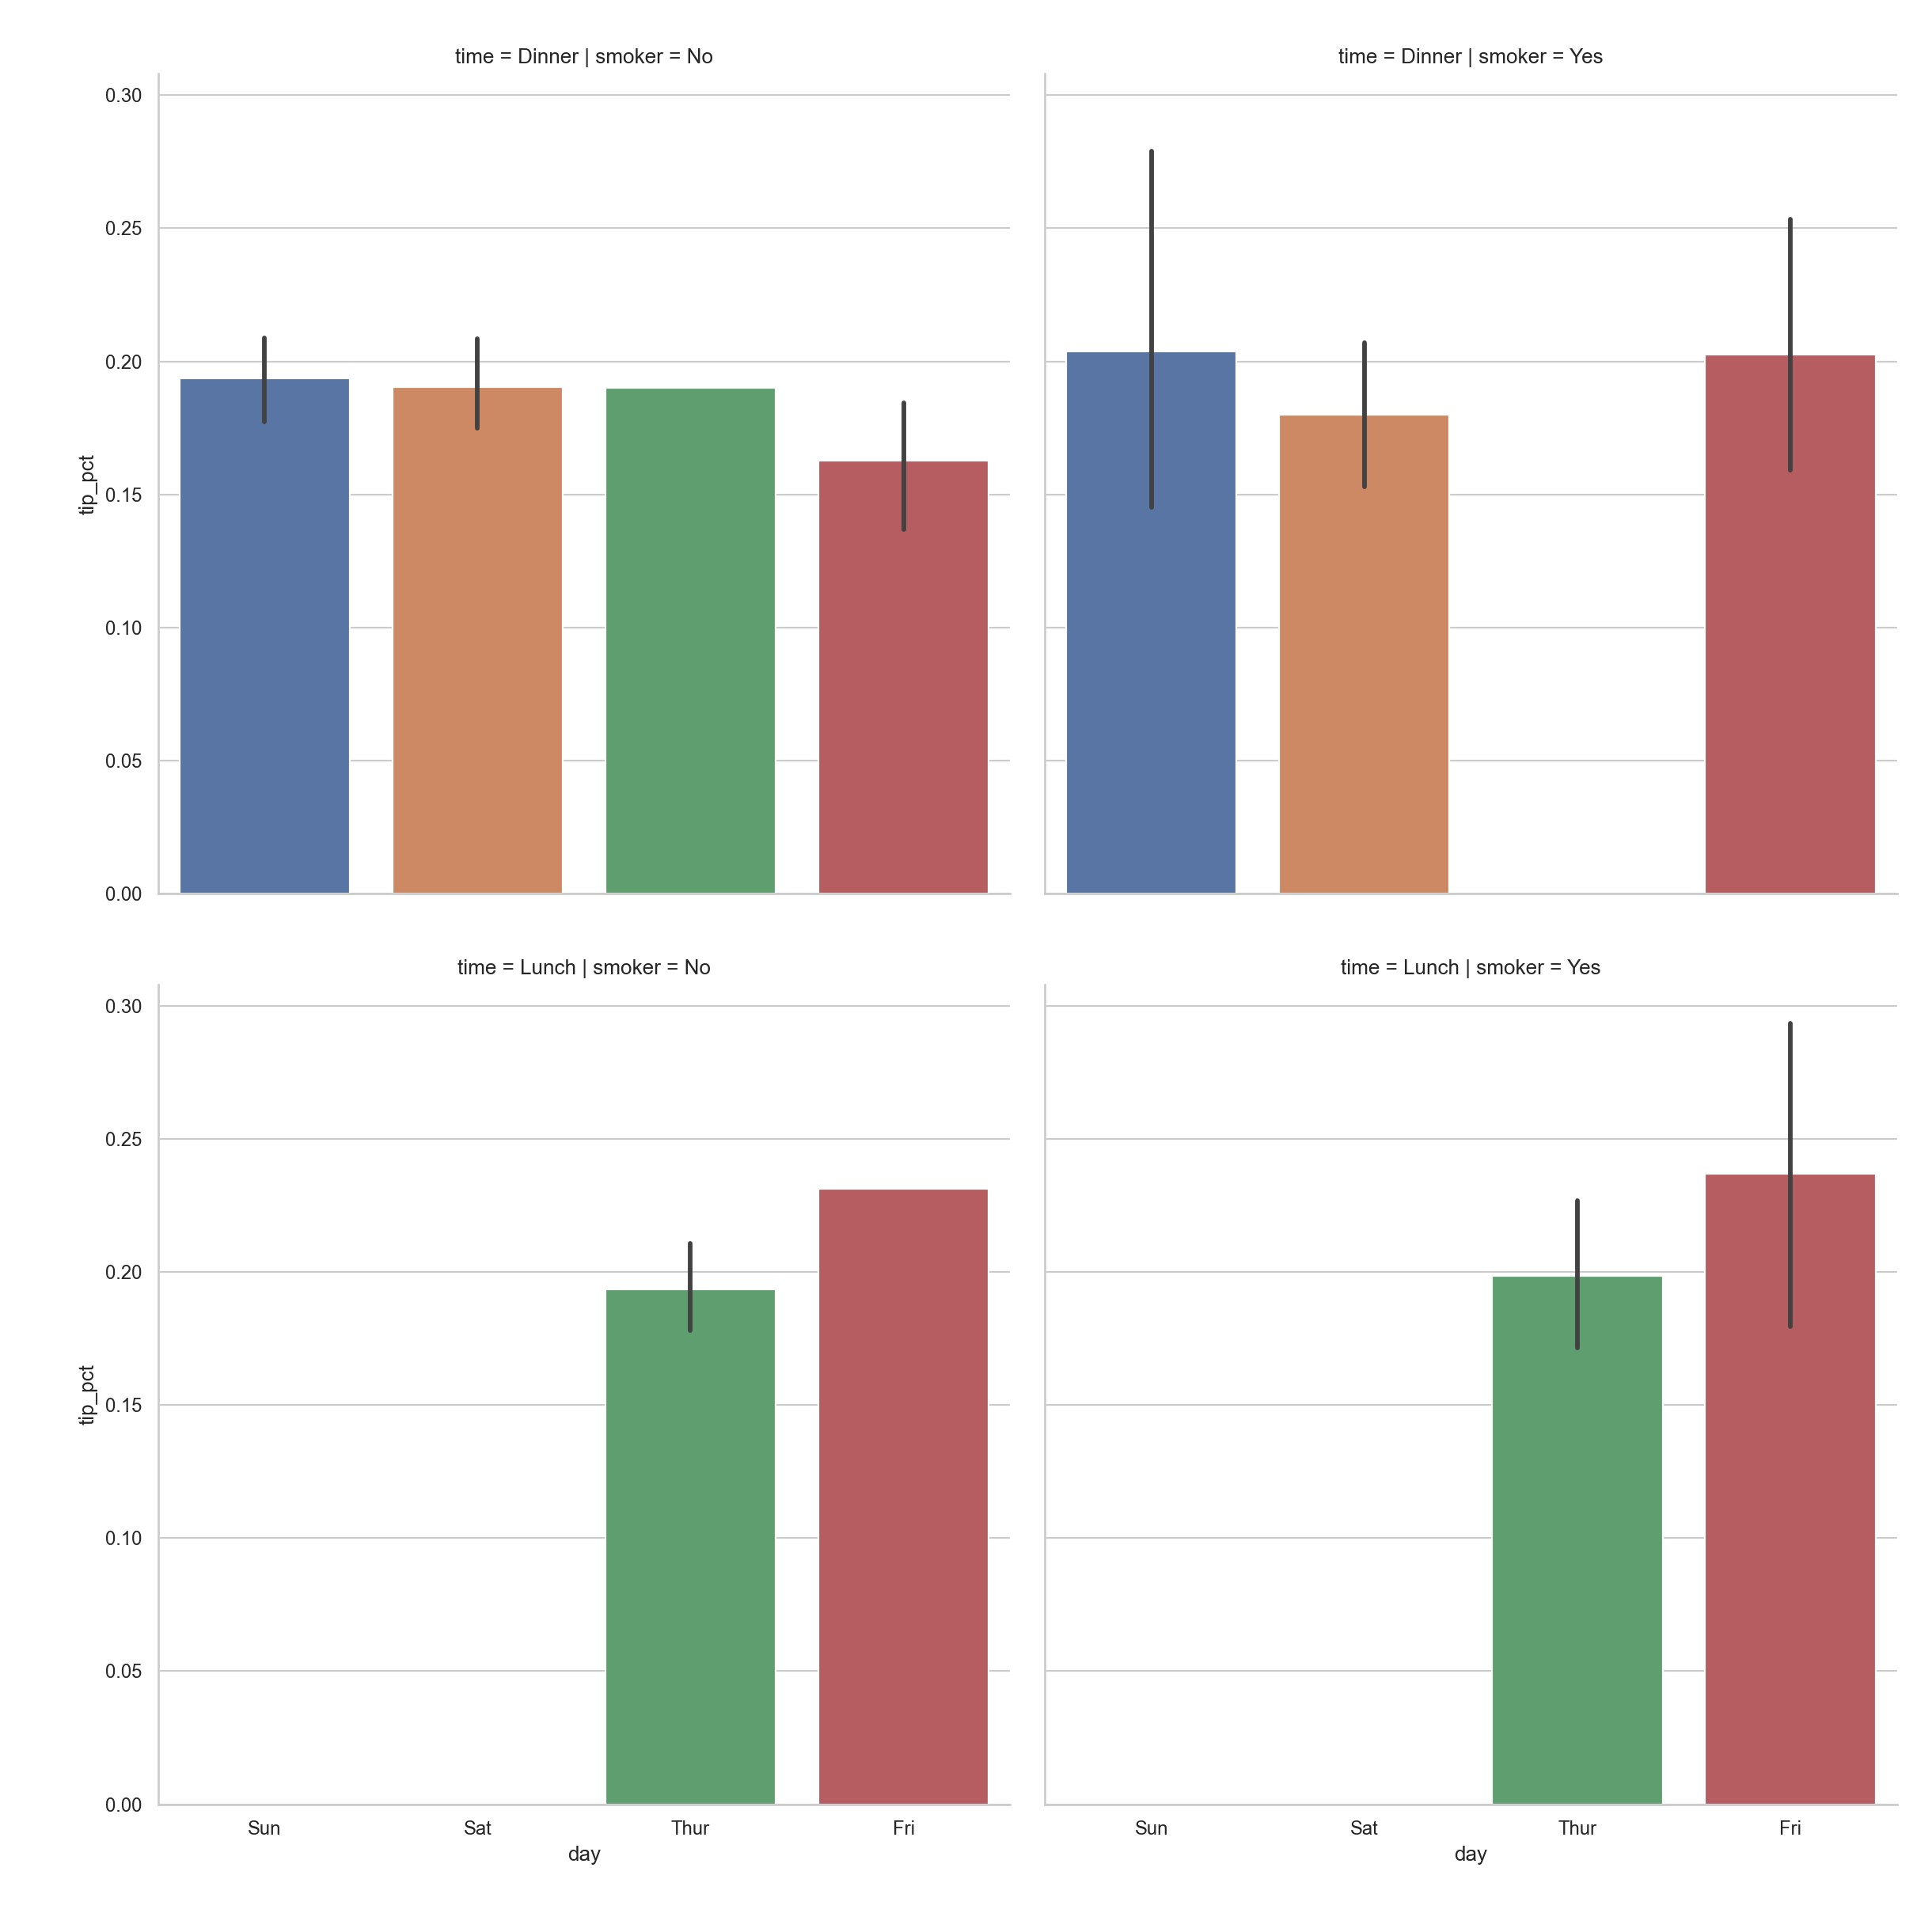

In [139]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\Public\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


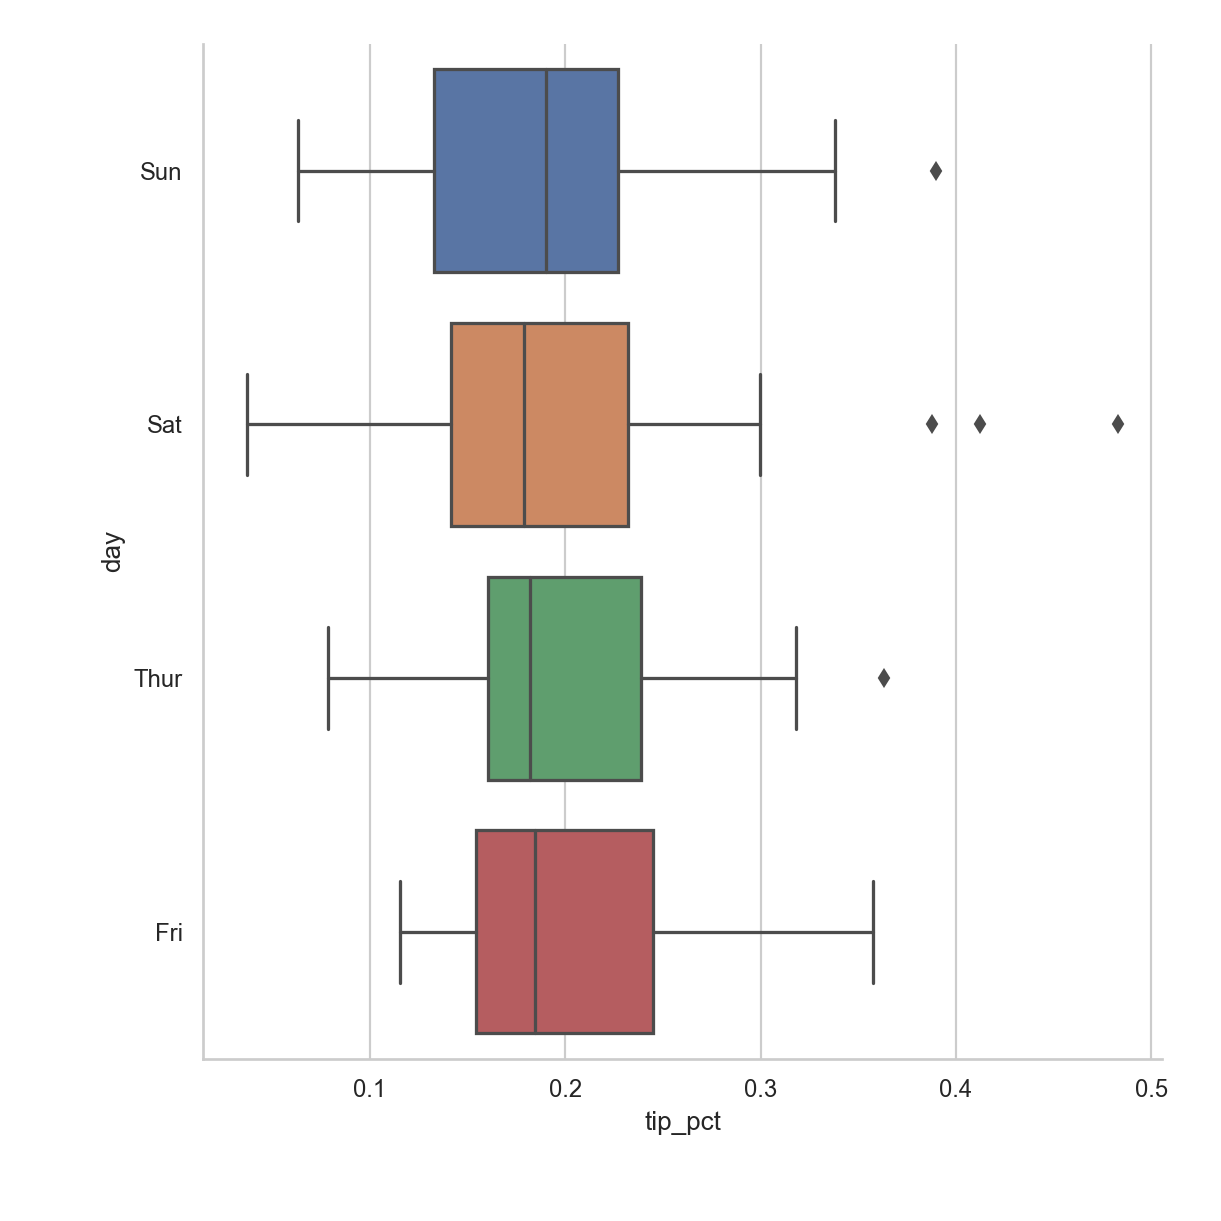

In [140]:
# 箱形圖
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## §9.3 Other Python Visualization Tools

## Conclusion

## Customizing Matplotlib: Configurations and Stylesheets
https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html

In [141]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

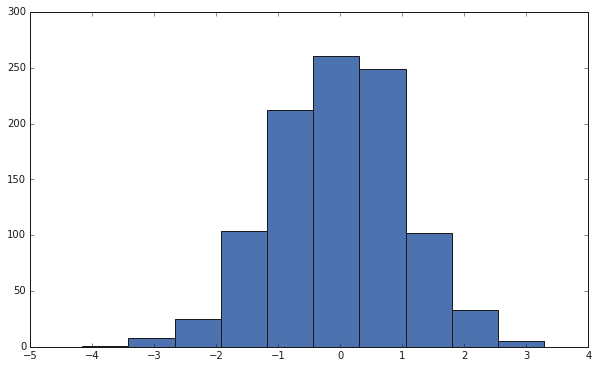

In [144]:
x = np.random.randn(1000)
plt.hist(x);

In [143]:
plt.rc('figure', figsize=(10, 6)) # runtime configurationa

In [ ]:
# plt.axes?

In [ ]:
# plt.rcParams

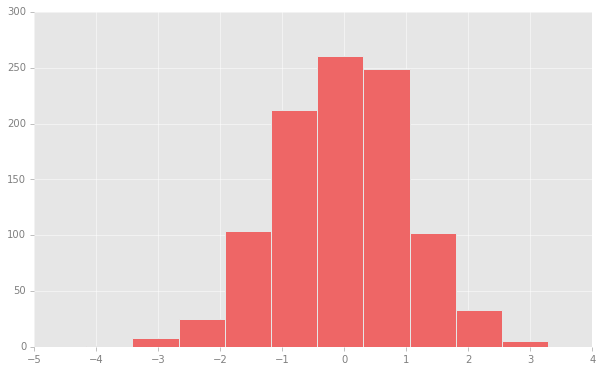

In [145]:
# use a gray background
# ax = plt.axes(axisbg='#E6E6E6') # 這個已經不能用了
ax = plt.axes() # Add an axes to the current figure and make it the current axes.

# 新的作法有兩種
# ax.set_facecolor("orange")
# OR
ax.set(facecolor = '#E6E6E6')

ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

In [ ]:
# IPython_default = plt.rcParams.copy()

In [148]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

(array([  1.,   8.,  25., 104., 212., 261., 249., 102.,  33.,   5.]),
 array([-4.1644, -3.4192, -2.6739, -1.9287, -1.1835, -0.4383,  0.3069,
         1.0522,  1.7974,  2.5426,  3.2878]),
 <BarContainer object of 10 artists>)

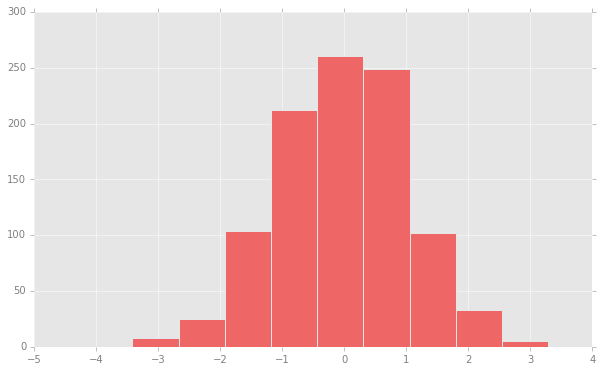

In [149]:
plt.hist(x)

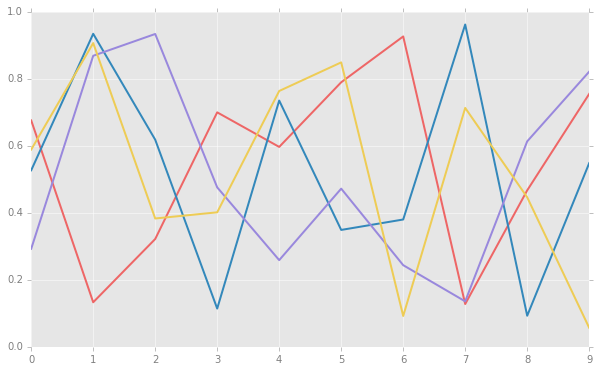

In [150]:
for i in range(4):
    plt.plot(np.random.rand(10))

In [ ]:
plt.style.available[:5]

## Stylesheets
The version 1.4 release of Matplotlib in August 2014 added a very convenient style module, which includes a number of new default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the .matplotlibrc files mentioned earlier, but must be named with a .mplstyle extension.

```python
plt.style.use('stylename')

with plt.style.context('stylename'):
    make_a_plot()
```

In [151]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

In [152]:
# reset rcParams
# plt.rcParams.update(IPython_default);

In [153]:
plt.rc('figure', figsize=(10, 6)) # runtime configurationa

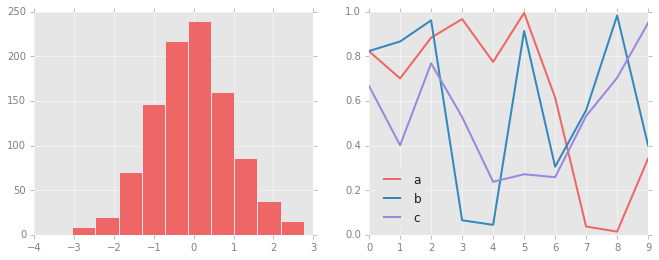

In [154]:
hist_and_lines()

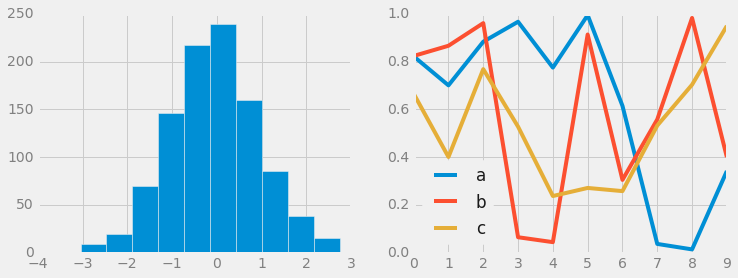

In [155]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

## ggplot
The ggplot package in the R language is a very popular visualization tool. Matplotlib's ggplot style mimics the default styles from that package:

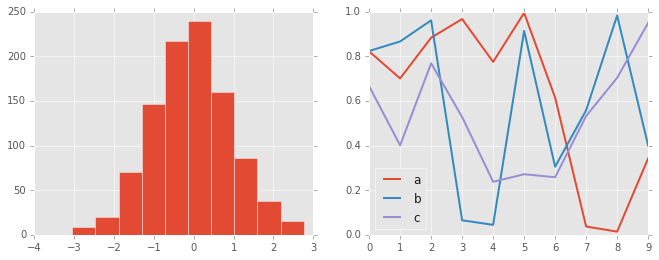

In [156]:
with plt.style.context('ggplot'):
    hist_and_lines()

## *Bayesian Methods for Hackers( style
There is a very nice short online book called Probabilistic Programming and Bayesian Methods for Hackers; it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book. This style is reproduced in the bmh stylesheet:

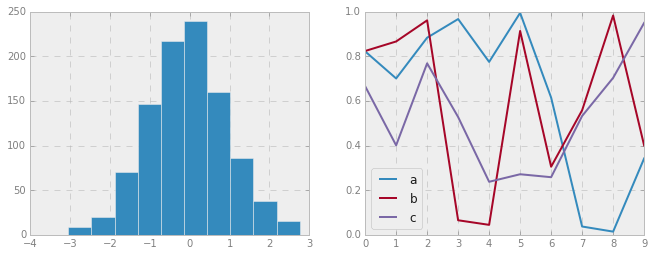

In [157]:
with plt.style.context('bmh'):
    hist_and_lines()

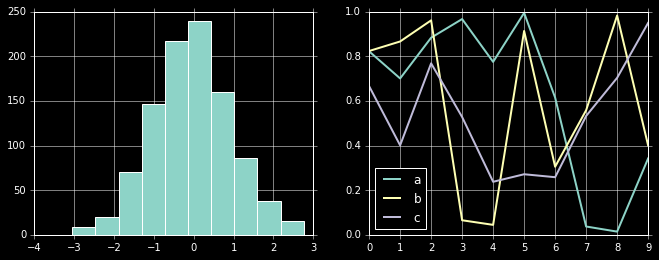

In [158]:
with plt.style.context('dark_background'):
    hist_and_lines()

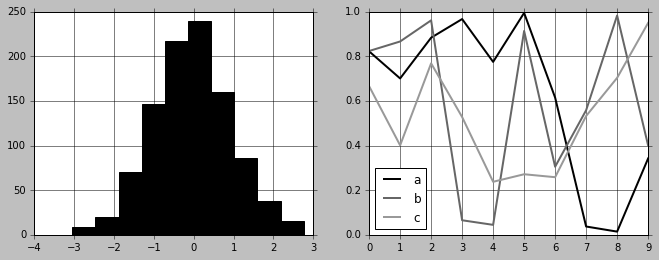

In [159]:
with plt.style.context('grayscale'):
    hist_and_lines()

## Seaborn style
Matplotlib also has stylesheets inspired by the Seaborn library (discussed more fully in Visualization With Seaborn). As we will see, these styles are loaded automatically when Seaborn is imported into a notebook. I've found these settings to be very nice, and tend to use them as defaults in my own data exploration.

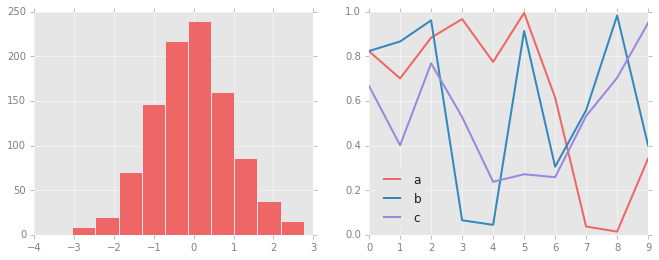

In [160]:
import seaborn
hist_and_lines()

## Visualization with Seaborn
https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html